In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import csv
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import random
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from matplotlib.patches import Patch
import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout, Bidirectional, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau

# **VALORACIONS ROA, ROC, RGA, RGC**

In [2]:
def calcular_val(fila, desplazamientos_normales):
    edad = fila['Edad']
    normales = desplazamientos_normales.loc[edad]
    val_ml1 = (fila['Despl_ML1'] / normales['Despl_ML1']) * 100
    val_ap1 = (fila['Despl_AP1'] / normales['Despl_AP1']) * 100
    val_ml2 = (fila['Despl_ML2'] / normales['Despl_ML2']) * 100
    val_ap2 = (fila['Despl_AP2'] / normales['Despl_AP2']) * 100

    val= (val_ml1 + val_ap1 +  val_ap2 + val_ml2) / 4
    return val

## **ROA**

In [3]:
dades_valROA = pd.read_csv("C:/Users/Maria/OneDrive/Escritorio/4tMatCAD/TFG/TFG Maria/VAL_ROA.csv", sep=",")
dades_valROA = dades_valROA.dropna().sort_values(by='Edad')
dades_valROA

,Edad,Val_ROA,Despl_ML1,Despl_AP1,Despl_ML2,Despl_AP2
197,24,100.0,13.890000,14.660000,9.380000,13.930000
43,26,95.629845,14.230000,36.460000,11.000000,33.900000
230,27,100.0,11.390000,16.860000,7.450000,15.610000
217,28,100.0,9.650000,27.110000,5.840000,13.390000
175,28,100.0,11.120000,13.620000,15.220000,12.000000
...,...,...,...,...,...,...
236,72,97.343751,23.000000,27.030000,27.800000,25.390000
232,72,100.0,11.020000,12.650000,12.480000,14.200000
214,72,97.956966,19.240000,23.620000,18.200000,28.180000
273,72,100.0,19.670388,18.653704,8.850149,15.764878


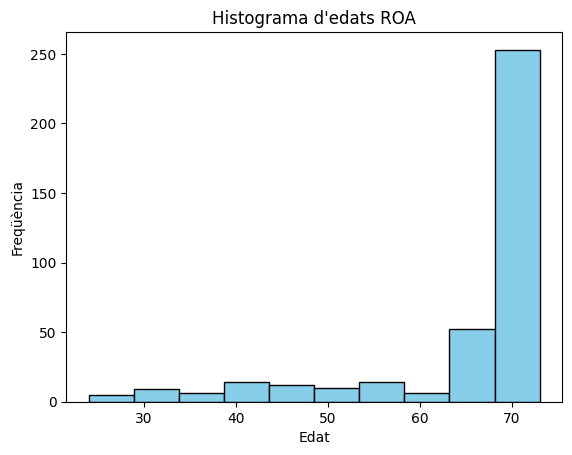

In [4]:
plt.hist(dades_valROA['Edad'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma d\'edats ROA')
plt.xlabel('Edat')
plt.ylabel('Freqüència')
plt.show()

In [5]:
# No tenim suficients casos de les altres edats
dades_valROA = dades_valROA.loc[dades_valROA['Edad'].isin([68, 69, 70, 71, 72])]

In [6]:
# Convertir la columna 'Val_ROA' a tipo numéric
dades_valROA['Val_ROA'] = pd.to_numeric(dades_valROA['Val_ROA'], errors='coerce')

C:\Users\Maria\AppData\Local\Temp\ipykernel_8668\259618315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dades_valROA['Val_ROA'] = pd.to_numeric(dades_valROA['Val_ROA'], errors='coerce')


In [7]:
df_100 = dades_valROA[dades_valROA['Val_ROA'] == 100]

In [8]:
despl_normales = df_100.groupby('Edad').mean()
despl_normales

,Val_ROA,Despl_ML1,Despl_AP1,Despl_ML2,Despl_AP2
Edad,,,,,
68,100.0,12.781964,18.163948,13.142015,17.470193
69,100.0,12.785320,17.309471,13.512678,17.672649
70,100.0,12.645084,16.761632,12.219339,17.126967
71,100.0,12.964087,18.269959,11.448911,17.427778
72,100.0,14.045763,17.889424,13.273303,16.272015


In [9]:
dades_valROA['Calcul_Val_ROA'] = dades_valROA.apply(lambda fila: calcular_val(fila, despl_normales), axis=1)
dades_valROA['Diferencia'] = dades_valROA['Val_ROA'] - dades_valROA['Calcul_Val_ROA']

C:\Users\Maria\AppData\Local\Temp\ipykernel_8668\218970676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dades_valROA['Calcul_Val_ROA'] = dades_valROA.apply(lambda fila: calcular_val(fila, despl_normales), axis=1)
C:\Users\Maria\AppData\Local\Temp\ipykernel_8668\218970676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dades_valROA['Diferencia'] = dades_valROA['Val_ROA'] - dades_valROA['Calcul_Val_ROA']


In [10]:
matrix_ROA=dades_valROA.corr().head(2)

In [11]:
dades_ROA = dades_valROA.head(50).copy()

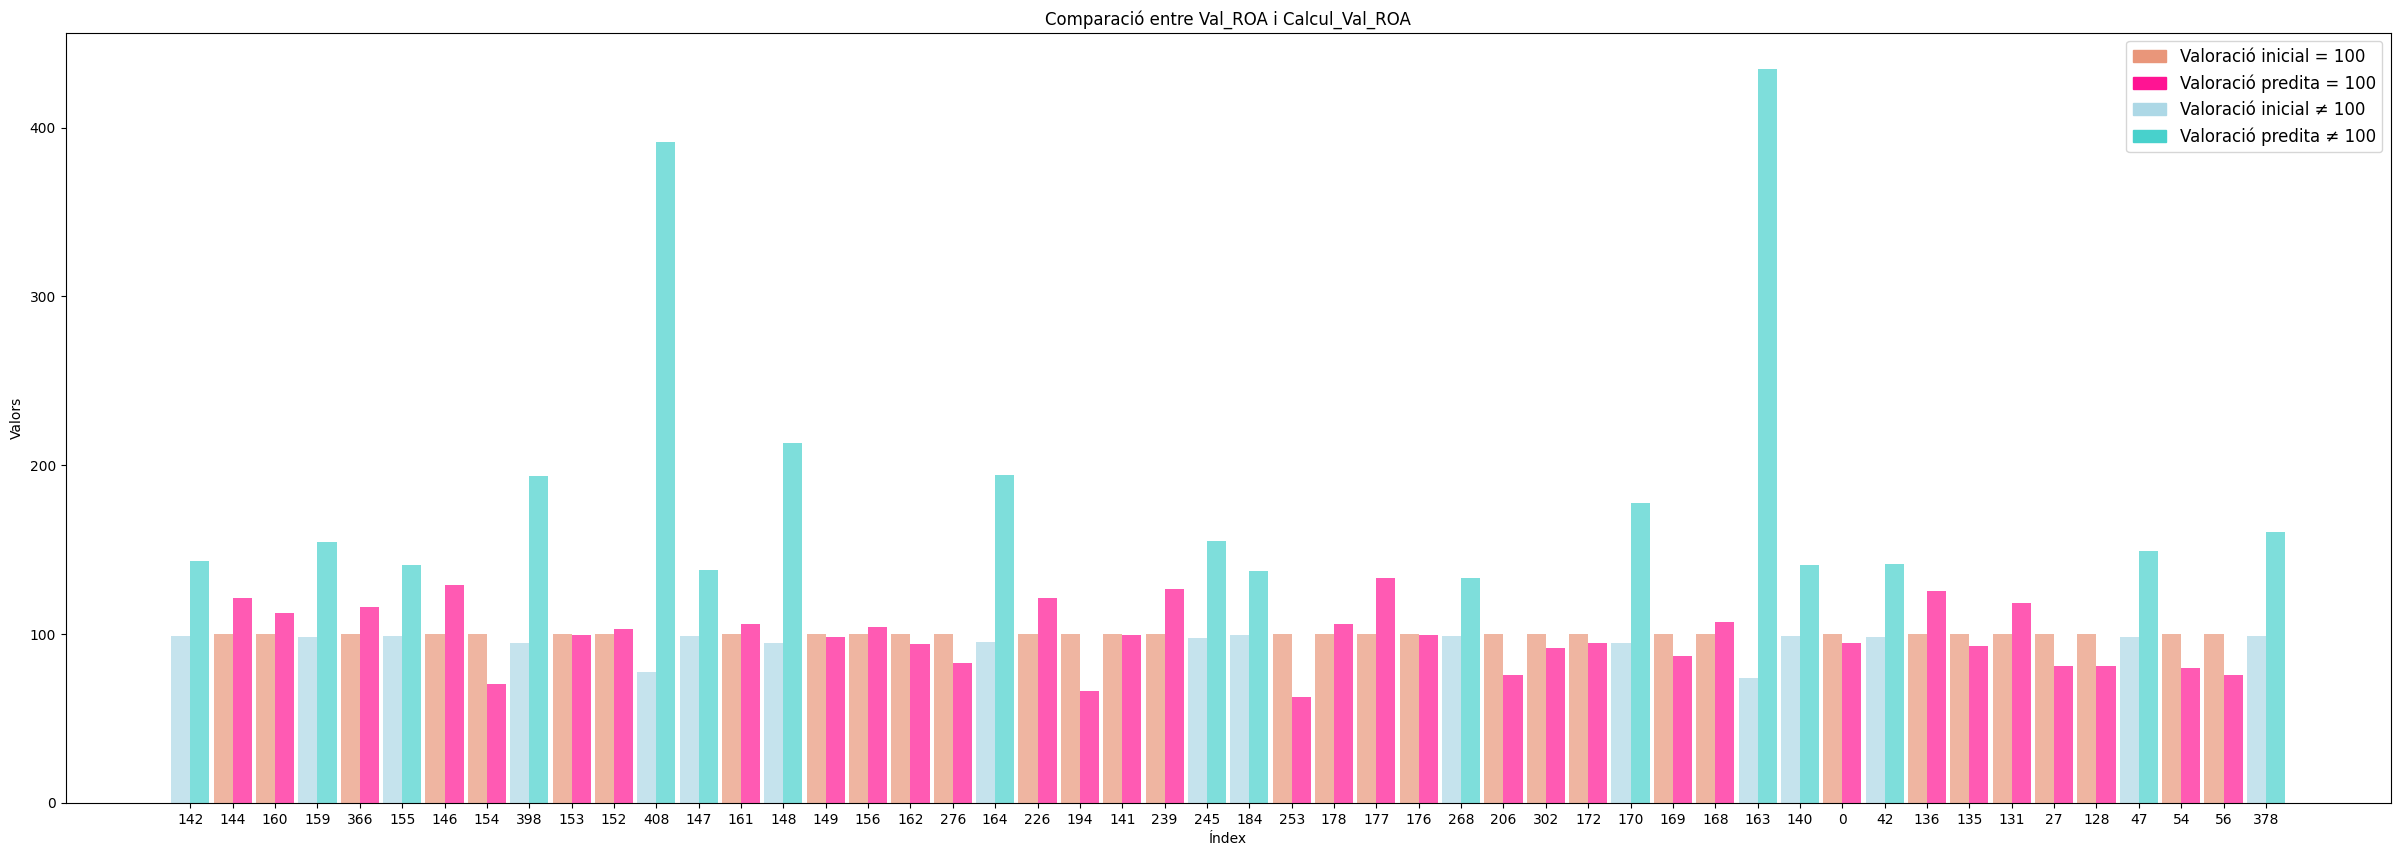

In [12]:
plt.figure(figsize=(30, 10))

ind = np.arange(len(dades_ROA))
width = 0.45  # Amplada de les barres

# Crear una llista de colors per a Val_ROA en funció de la condició
colors_val_roa = ['darksalmon' if val == 100 else 'lightblue' for val in dades_ROA['Val_ROA']]
colors_calculo_val_roa = ['deeppink' if val == 100 else 'mediumturquoise' for val in dades_ROA['Val_ROA']]

plt.bar(ind, dades_ROA['Val_ROA'], width, label='Val_ROA', color=colors_val_roa, alpha=0.7)
plt.bar(ind + width, dades_ROA['Calcul_Val_ROA'], width, label='Calcul_Val_ROA', color=colors_calculo_val_roa, alpha=0.7)

plt.xlabel('Índex')
plt.ylabel('Valors')
plt.title('Comparació entre Val_ROA i Calcul_Val_ROA')
plt.xticks(ind + width / 2, dades_ROA.index)  # Ajustar les etiquetes de l'eix x per mostrar els índexs


legend_elements = [
    Patch(facecolor='darksalmon', edgecolor='darksalmon', label='Valoració inicial = 100'),
    Patch(facecolor='deeppink', edgecolor='deeppink', label='Valoració predita = 100'),
    Patch(facecolor='lightblue', edgecolor='lightblue', label='Valoració inicial ≠ 100'),
    Patch(facecolor='mediumturquoise', edgecolor='mediumturquoise', label='Valoració predita ≠ 100')
]
plt.legend(handles=legend_elements, loc='best', prop={'size': 12})

plt.show()

In [13]:
dades_valROA_aux= dades_valROA[dades_valROA['Val_ROA']!= 100].sort_values(by='Val_ROA').copy()

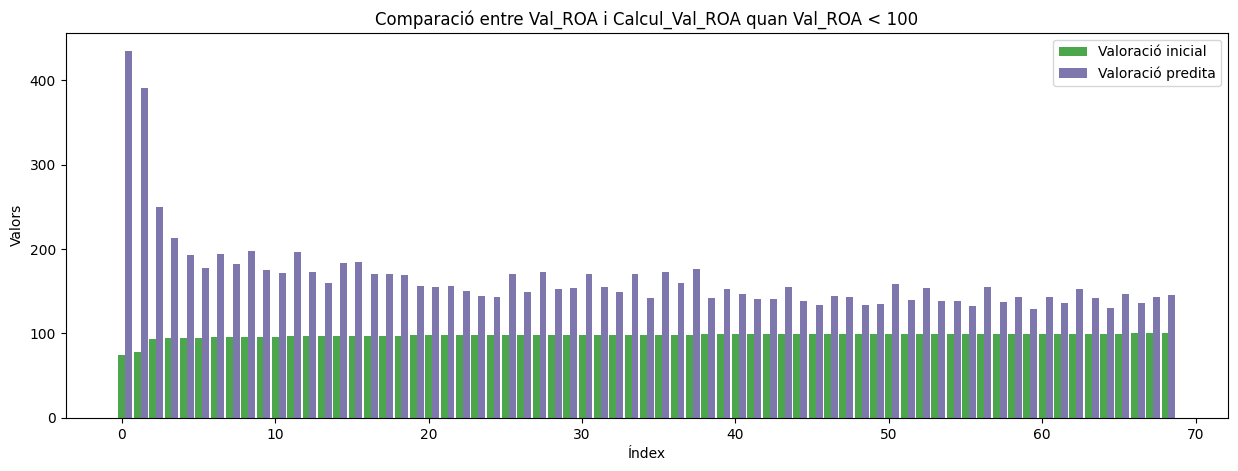

In [14]:
plt.figure(figsize=(15,5))

ind = np.arange(len(dades_valROA_aux))
width = 0.45  # Amplada de les barres

Val_inici=plt.bar(ind, dades_valROA_aux['Val_ROA'], width, label='Val_ROA', color='green', alpha=0.7)
val_predita= plt.bar(ind + width, dades_valROA_aux['Calcul_Val_ROA'], width, label='Calcul_Val_ROA', color='darkslateblue', alpha=0.7)

plt.xlabel('Índex')
plt.ylabel('Valors')
plt.title('Comparació entre Val_ROA i Calcul_Val_ROA quan Val_ROA < 100')
plt.legend([Val_inici, val_predita], ['Valoració inicial', 'Valoració predita'])
plt.show()

## **ROC**

In [15]:
dades_valROC = pd.read_csv("C:/Users/Maria/OneDrive/Escritorio/4tMatCAD/TFG/TFG Maria/VAL_ROC.csv", sep=",")
dades_valROC.dropna().sort_values(by='Edad')

,Edad,Val_ROC,Despl_ML1,Despl_AP1,Despl_ML2,Despl_AP2
197,24,96.016538,33.620000,23.070000,25.540000,25.040000
43,26,92.915904,32.240000,36.150000,28.460000,34.650000
230,27,100.0,13.890000,25.570000,12.860000,17.360000
377,27,96.216791,15.880000,38.240000,19.770000,33.780000
217,28,99.73775,16.450000,29.430000,12.380000,21.320000
...,...,...,...,...,...,...
300,72,100.0,15.460000,20.240000,11.250000,12.750000
292,72,100.0,12.400000,11.970000,10.030000,14.190000
286,72,94.233676,35.920000,35.860000,47.730000,45.860000
261,72,100.0,13.920000,15.550000,10.070000,15.410000


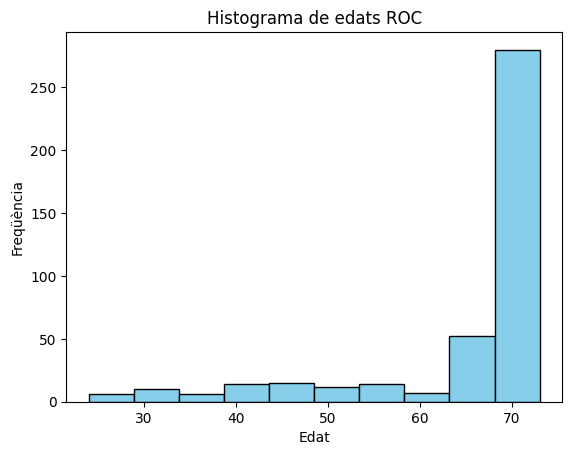

In [16]:
plt.hist(dades_valROC['Edad'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma de edats ROC')
plt.xlabel('Edat')
plt.ylabel('Freqüència')
plt.show()

In [17]:
# No tenim suficients casos de les altres edats
dades_valROC = dades_valROC.loc[dades_valROC['Edad'].isin([68, 69, 70, 71, 72])]

In [18]:
# Convertir la columna 'Val_ROA' a tipo numéric
dades_valROC['Val_ROC'] = pd.to_numeric(dades_valROC['Val_ROC'], errors='coerce')

In [19]:
# Eliminar las filas que contienen NaN en la columna 'Val_RGC'
dades_valROC = dades_valROC.dropna()

In [20]:
df_100 = dades_valROC[dades_valROC['Val_ROC'] == 100]

In [21]:
despl_normales = df_100.groupby('Edad').mean()
despl_normales

,Val_ROC,Despl_ML1,Despl_AP1,Despl_ML2,Despl_AP2
Edad,,,,,
68,100.0,16.619718,25.563503,15.611259,22.656522
69,100.0,17.573894,23.409983,15.940900,22.464786
70,100.0,16.862149,24.317488,15.839573,22.569180
71,100.0,16.565516,22.433557,14.693714,21.331507
72,100.0,17.441340,21.497143,15.310229,18.421545


In [22]:
dades_valROC['Calcul_Val_ROC'] = dades_valROC.apply(lambda fila: calcular_val(fila, despl_normales), axis=1)
dades_valROC['Diferencia'] = dades_valROC['Val_ROC'] - dades_valROC['Calcul_Val_ROC']

In [23]:
matrix_ROC= dades_valROC.corr().head(2)

In [24]:
dades_ROC = dades_valROC.head(50).copy()

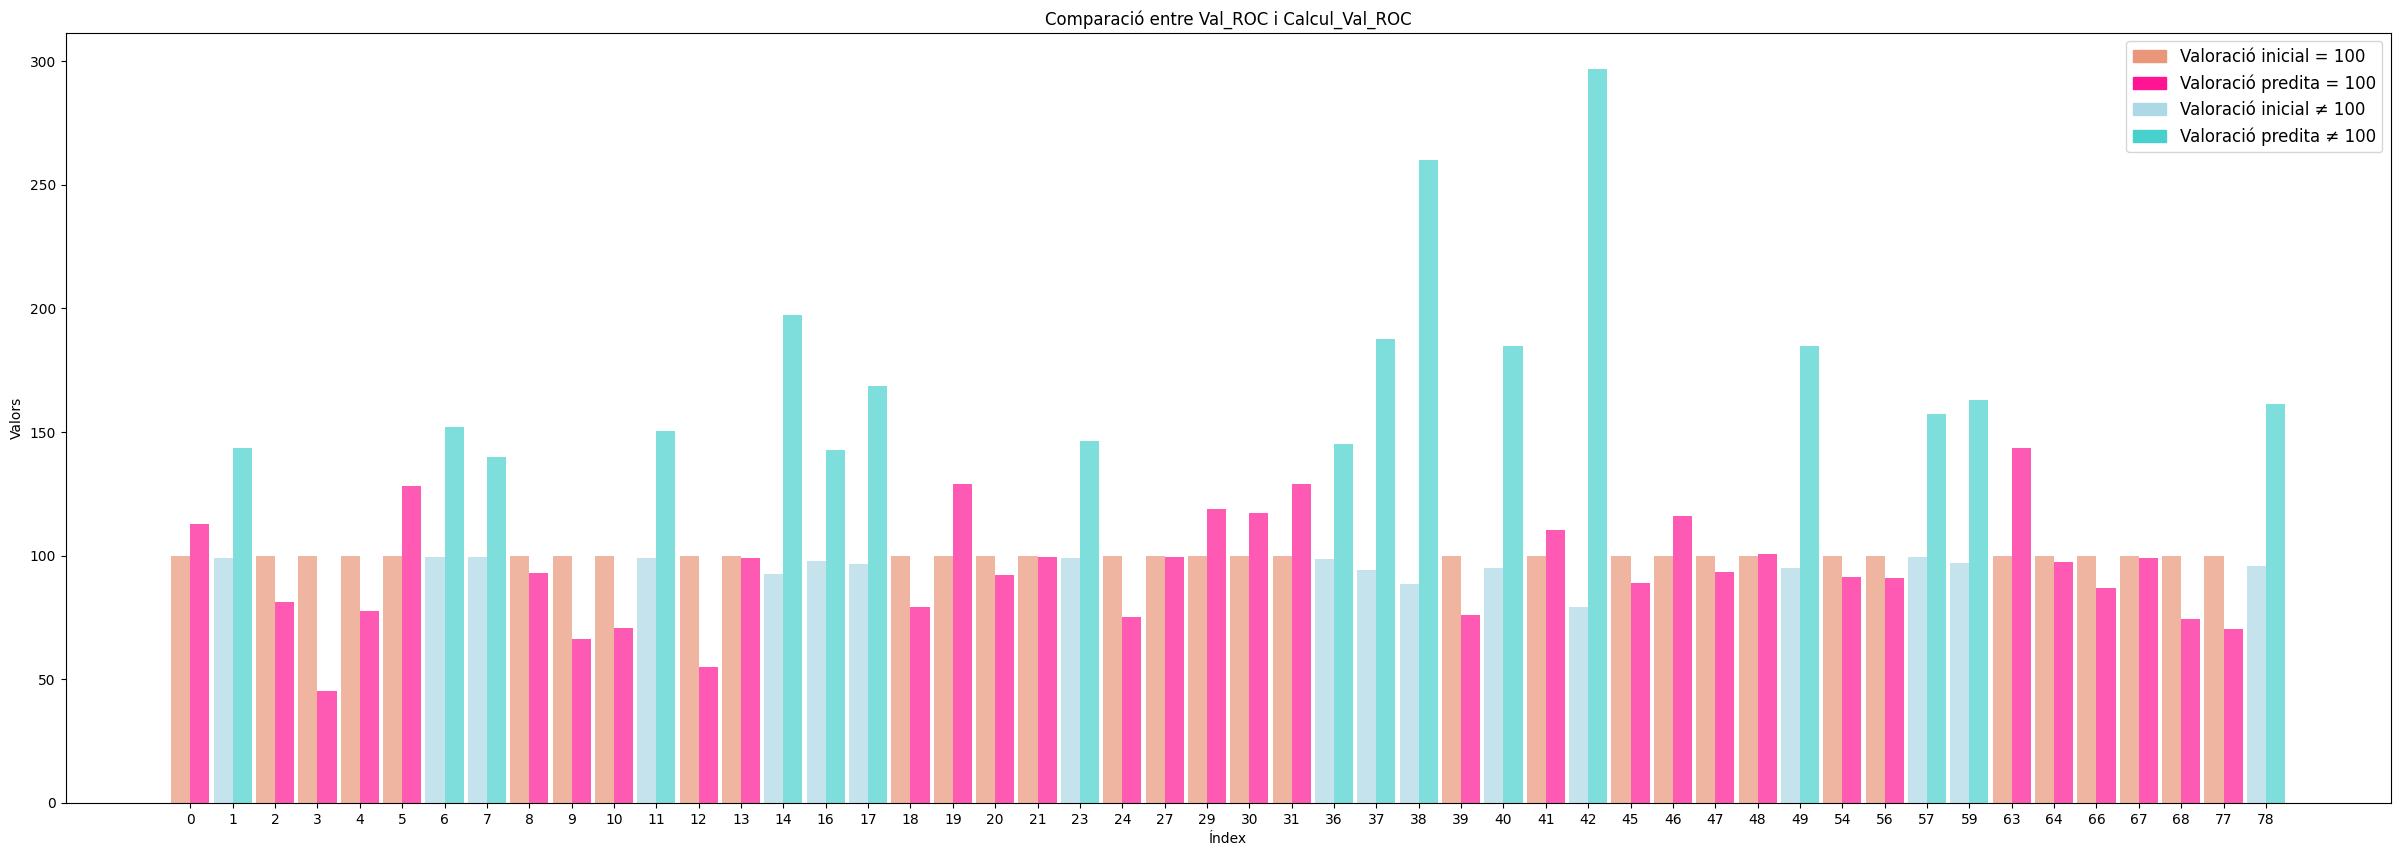

In [25]:
plt.figure(figsize=(30, 10))

ind = np.arange(len(dades_ROC))
width = 0.45  # Amplada de les barres

# Crear una llista de colors per a Val_ROA en funció de la condició
colors_val_roc = ['darksalmon' if val == 100 else 'lightblue' for val in dades_ROC['Val_ROC']]
colors_calculo_val_roc = ['deeppink' if val == 100 else 'mediumturquoise' for val in dades_ROC['Val_ROC']]


plt.bar(ind, dades_ROC['Val_ROC'], width, label='Val_ROC', color=colors_val_roc, alpha=0.7)
plt.bar(ind + width, dades_ROC['Calcul_Val_ROC'], width, label='Calcul_Val_ROC', color=colors_calculo_val_roc, alpha=0.7)

plt.xlabel('Índex')
plt.ylabel('Valors')
plt.title('Comparació entre Val_ROC i Calcul_Val_ROC')
plt.xticks(ind + width / 2, dades_ROC.index)  # Ajustar les etiquetes de l'eix x per mostrar els índexs

legend_elements = [
    Patch(facecolor='darksalmon', edgecolor='darksalmon', label='Valoració inicial = 100'),
    Patch(facecolor='deeppink', edgecolor='deeppink', label='Valoració predita = 100'),
    Patch(facecolor='lightblue', edgecolor='lightblue', label='Valoració inicial ≠ 100'),
    Patch(facecolor='mediumturquoise', edgecolor='mediumturquoise', label='Valoració predita ≠ 100')
]
plt.legend(handles=legend_elements, loc='best', prop={'size': 12})


plt.show()

In [26]:
dades_valROC_aux=dades_valROC[dades_valROC['Val_ROC']!= 100].sort_values(by='Val_ROC').copy()

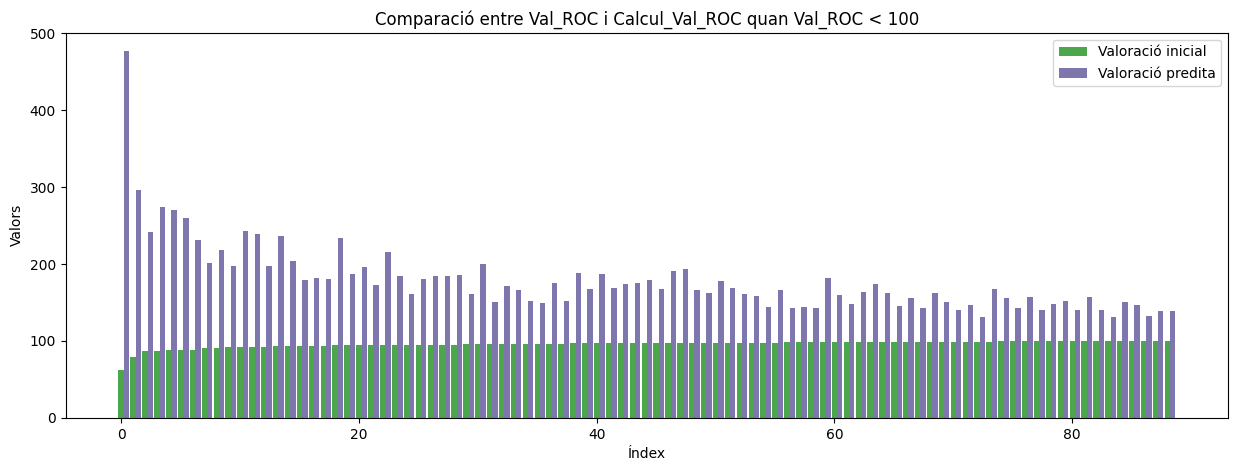

In [27]:
plt.figure(figsize=(15,5))

ind = np.arange(len(dades_valROC_aux))
width = 0.45  # Amplada de les barres


Val_inici = plt.bar(ind, dades_valROC_aux['Val_ROC'], width, label='Val_ROC', color='green', alpha=0.7)
val_predita = plt.bar(ind + width, dades_valROC_aux['Calcul_Val_ROC'], width, label='Calcul_Val_ROC', color='darkslateblue', alpha=0.7)

plt.xlabel('Índex')
plt.ylabel('Valors')
plt.title('Comparació entre Val_ROC i Calcul_Val_ROC quan Val_ROC < 100')
# plt.xticks(ind + width / 2, dades_valROC_aux.index)  # Ajustar les etiquetes de l'eix x per mostrar els índexs
plt.legend([Val_inici, val_predita], ['Valoració inicial', 'Valoració predita'])

plt.show()

# **RGA**

In [28]:
dades_valRGA = pd.read_csv("C:/Users/Maria/OneDrive/Escritorio/4tMatCAD/TFG/TFG Maria/VAL_RGA.csv", sep=",")
dades_valRGA.dropna().sort_values(by='Edad')

,Edad,Val_RGA,Despl_ML1,Despl_AP1,Despl_ML2,Despl_AP2
197,24,98.476698,31.150000,28.880000,29.450000,25.560000
43,26,98.246571,31.640000,36.790000,22.750000,28.170000
230,27,100.0,18.140000,34.100000,17.630000,26.540000
377,27,100.0,15.530000,21.590000,15.980000,38.260000
175,28,92.408253,31.710000,38.340000,32.760000,45.950000
...,...,...,...,...,...,...
300,72,95.666212,57.230000,40.710000,35.810000,42.610000
200,72,83.965229,52.930000,55.320000,67.020000,67.310000
322,72,100.0,19.890000,31.430000,33.240000,43.200000
266,72,99.668349,30.710000,49.030000,36.000000,45.300000


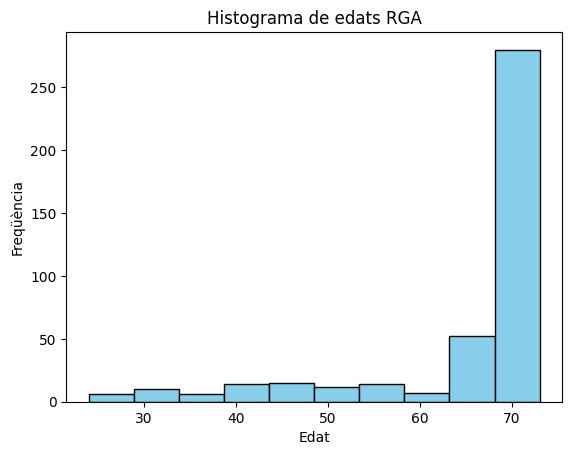

In [29]:
plt.hist(dades_valRGA['Edad'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma de edats RGA')
plt.xlabel('Edat')
plt.ylabel('Freqüència')
plt.show()

In [30]:
# No tenim suficients casos de les altres edats
dades_valRGA = dades_valRGA.loc[dades_valRGA['Edad'].isin([68, 69, 70, 71, 72])]

In [31]:
# Convertir la columna 'Val_ROA' a tipo numéric
dades_valRGA['Val_RGA'] = pd.to_numeric(dades_valRGA['Val_RGA'], errors='coerce')

In [32]:
# Eliminar las filas que contienen NaN en la columna 'Val_RGC'
dades_valRGA = dades_valRGA.dropna()

In [33]:
df_100 = dades_valRGA[dades_valRGA['Val_RGA'] == 100]

In [34]:
despl_normales = df_100.groupby('Edad').mean()
despl_normales

,Val_RGA,Despl_ML1,Despl_AP1,Despl_ML2,Despl_AP2
Edad,,,,,
68,100.0,27.600114,35.521712,26.634348,30.115361
69,100.0,28.661333,32.939988,27.385171,32.963704
70,100.0,29.636790,33.000649,25.658171,32.444051
71,100.0,28.547317,35.248024,24.001129,30.900983
72,100.0,28.237719,35.153476,29.236209,34.586916


In [35]:
dades_valRGA['Calcul_Val_RGA'] = dades_valRGA.apply(lambda fila: calcular_val(fila, despl_normales), axis=1)
dades_valRGA['Diferencia'] = dades_valRGA['Val_RGA'] - dades_valRGA['Calcul_Val_RGA']

In [36]:
matrix_RGA=dades_valRGA.corr().head(2)

In [37]:
dades_RGA= dades_valRGA.head(50).copy()

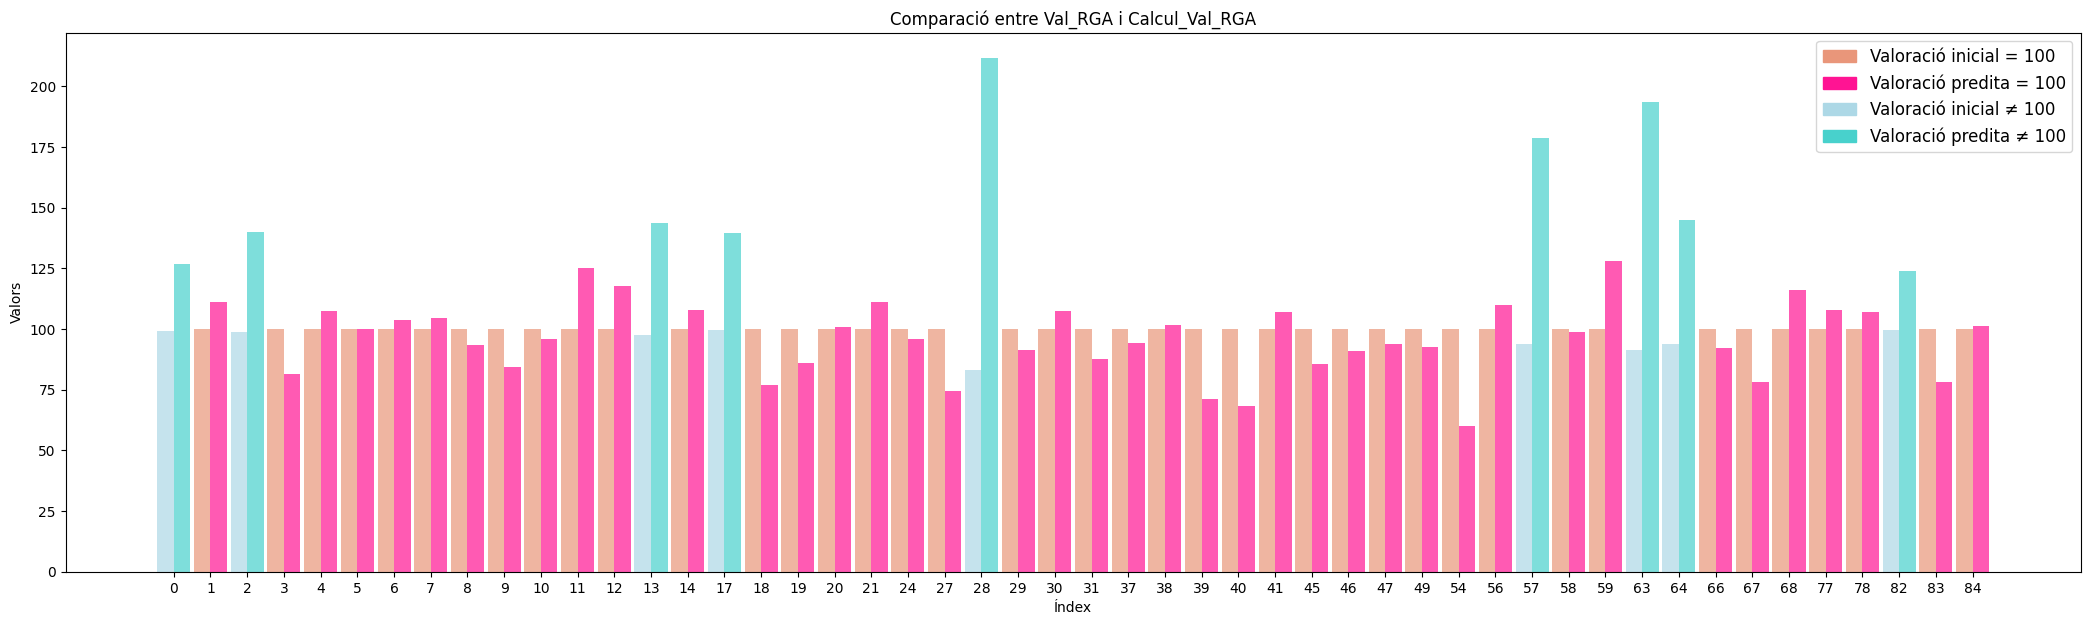

In [38]:
plt.figure(figsize=(26, 7))

ind = np.arange(len(dades_RGA))
width = 0.45  # Amplada de les barres

# Crear una llista de colors per a Val_ROA en funció de la condició
colors_val_rga = ['darksalmon' if val == 100 else 'lightblue' for val in dades_RGA['Val_RGA']]
colors_calculo_val_rga = ['deeppink' if val == 100 else 'mediumturquoise' for val in dades_RGA['Val_RGA']]


bar1=plt.bar(ind, dades_RGA['Val_RGA'], width, label='Val_RGA', color=colors_val_rga, alpha=0.7)
bar2= plt.bar(ind + width, dades_RGA['Calcul_Val_RGA'], width, label='Calcul_Val_RGA', color=colors_calculo_val_rga, alpha=0.7)

plt.xlabel('Índex')
plt.ylabel('Valors')
plt.title('Comparació entre Val_RGA i Calcul_Val_RGA')
plt.xticks(ind + width / 2, dades_RGA.index)  # Ajustar les etiquetes de l'eix x per mostrar els índexs

legend_elements = [
    Patch(facecolor='darksalmon', edgecolor='darksalmon', label='Valoració inicial = 100'),
    Patch(facecolor='deeppink', edgecolor='deeppink', label='Valoració predita = 100'),
    Patch(facecolor='lightblue', edgecolor='lightblue', label='Valoració inicial ≠ 100'),
    Patch(facecolor='mediumturquoise', edgecolor='mediumturquoise', label='Valoració predita ≠ 100')
]
plt.legend(handles=legend_elements, loc='best', prop={'size': 12})

plt.show()

In [39]:
dades_valRGA_aux=dades_valRGA[dades_valRGA['Val_RGA']!= 100].sort_values(by='Val_RGA').copy()

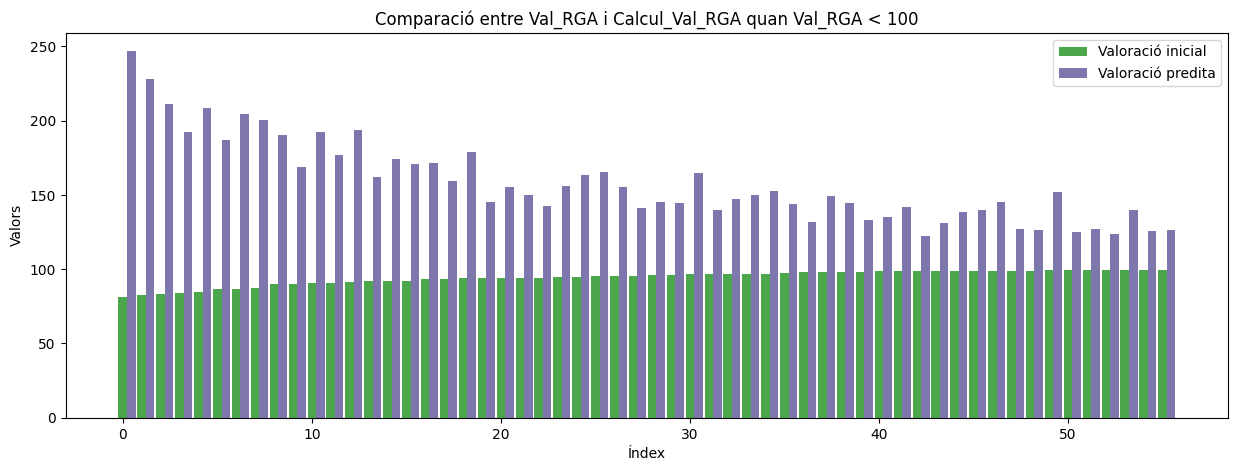

In [40]:
plt.figure(figsize=(15,5))

ind = np.arange(len(dades_valRGA_aux))
width = 0.45  # Amplada de les barres


Val_inici=plt.bar(ind, dades_valRGA_aux['Val_RGA'], width, label='Val_RGA', color='green', alpha=0.7)
val_predita=plt.bar(ind + width, dades_valRGA_aux['Calcul_Val_RGA'], width, label='Calcul_Val_RGA', color='darkslateblue', alpha=0.7)

plt.xlabel('Índex')
plt.ylabel('Valors')
plt.title('Comparació entre Val_RGA i Calcul_Val_RGA quan Val_RGA < 100')
plt.legend([Val_inici, val_predita], ['Valoració inicial', 'Valoració predita'])
plt.show()

# **RGC**

In [41]:
dades_valRGC = pd.read_csv("C:/Users/Maria/OneDrive/Escritorio/4tMatCAD/TFG/TFG Maria/VAL_RGC.csv", sep=",")
dades_valRGC.dropna().sort_values(by='Edad')

,Edad,Val_RGC,Despl_ML1,Despl_AP1,Despl_ML2,Despl_AP2
197,24,84.063515,74.510000,81.600000,80.810000,71.140000
43,26,100.0,34.760000,61.000000,32.460000,88.090000
377,27,100.0,33.240000,56.550000,31.910000,42.820000
230,27,94.976185,49.000000,60.970000,65.540000,68.260000
217,28,100.0,45.730000,67.030000,46.280000,45.860000
...,...,...,...,...,...,...
300,72,100.0,50.370000,61.380000,53.270000,64.670000
292,72,100.0,41.420000,61.620000,33.960000,46.860000
318,72,100.0,55.700000,82.140000,63.780000,70.130000
213,72,99.801326,82.640000,86.620000,63.730000,75.270000


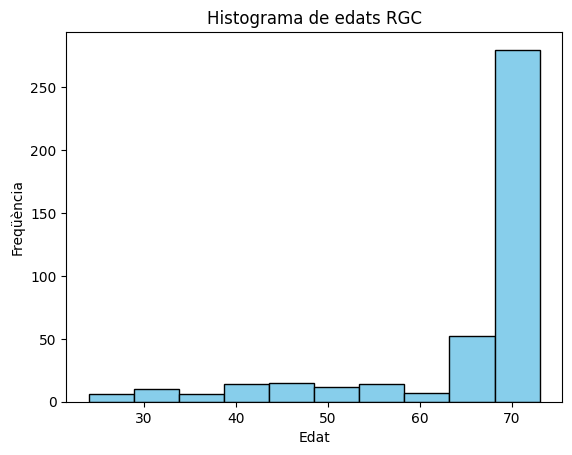

In [42]:
plt.hist(dades_valRGC['Edad'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma de edats RGC')
plt.xlabel('Edat')
plt.ylabel('Freqüència')
plt.show()

In [43]:
# No tenim suficients casos de les altres edats
dades_valRGC = dades_valRGC.loc[dades_valRGC['Edad'].isin([68, 69, 70, 71, 72])]

In [44]:
# Convertir la columna 'Val_ROA' a tipo numéric
dades_valRGC['Val_RGC'] = pd.to_numeric(dades_valRGC['Val_RGC'], errors='coerce')
dades_valRGC['Val_RGC'] = dades_valRGC['Val_RGC'].replace(0, np.nan)

In [45]:
# Eliminar las filas que contenen NaN en la columna 'Val_RGC'
dades_valRGC = dades_valRGC.dropna()

In [46]:
df_100 = dades_valRGC[dades_valRGC['Val_RGC'] == 100]

In [47]:
despl_normales = df_100.groupby('Edad').mean()
despl_normales

,Val_RGC,Despl_ML1,Despl_AP1,Despl_ML2,Despl_AP2
Edad,,,,,
68,100.0,62.243077,67.233846,64.584615,65.808462
69,100.0,69.404788,70.329106,61.937110,66.295653
70,100.0,65.018283,71.800720,59.395352,65.116498
71,100.0,68.792973,73.217220,58.453370,68.965435
72,100.0,63.215000,73.651667,61.488333,68.647500


In [48]:
dades_valRGC['Calcul_Val_RGC'] = dades_valRGC.apply(lambda fila: calcular_val(fila, despl_normales), axis=1)
dades_valRGC['Diferencia'] = dades_valRGC['Val_RGC'] - dades_valRGC['Calcul_Val_RGC']

In [49]:
matrix_RGC= dades_valRGC.corr().head(2)

In [50]:
dades_RGC =dades_valRGC.head(50).copy()

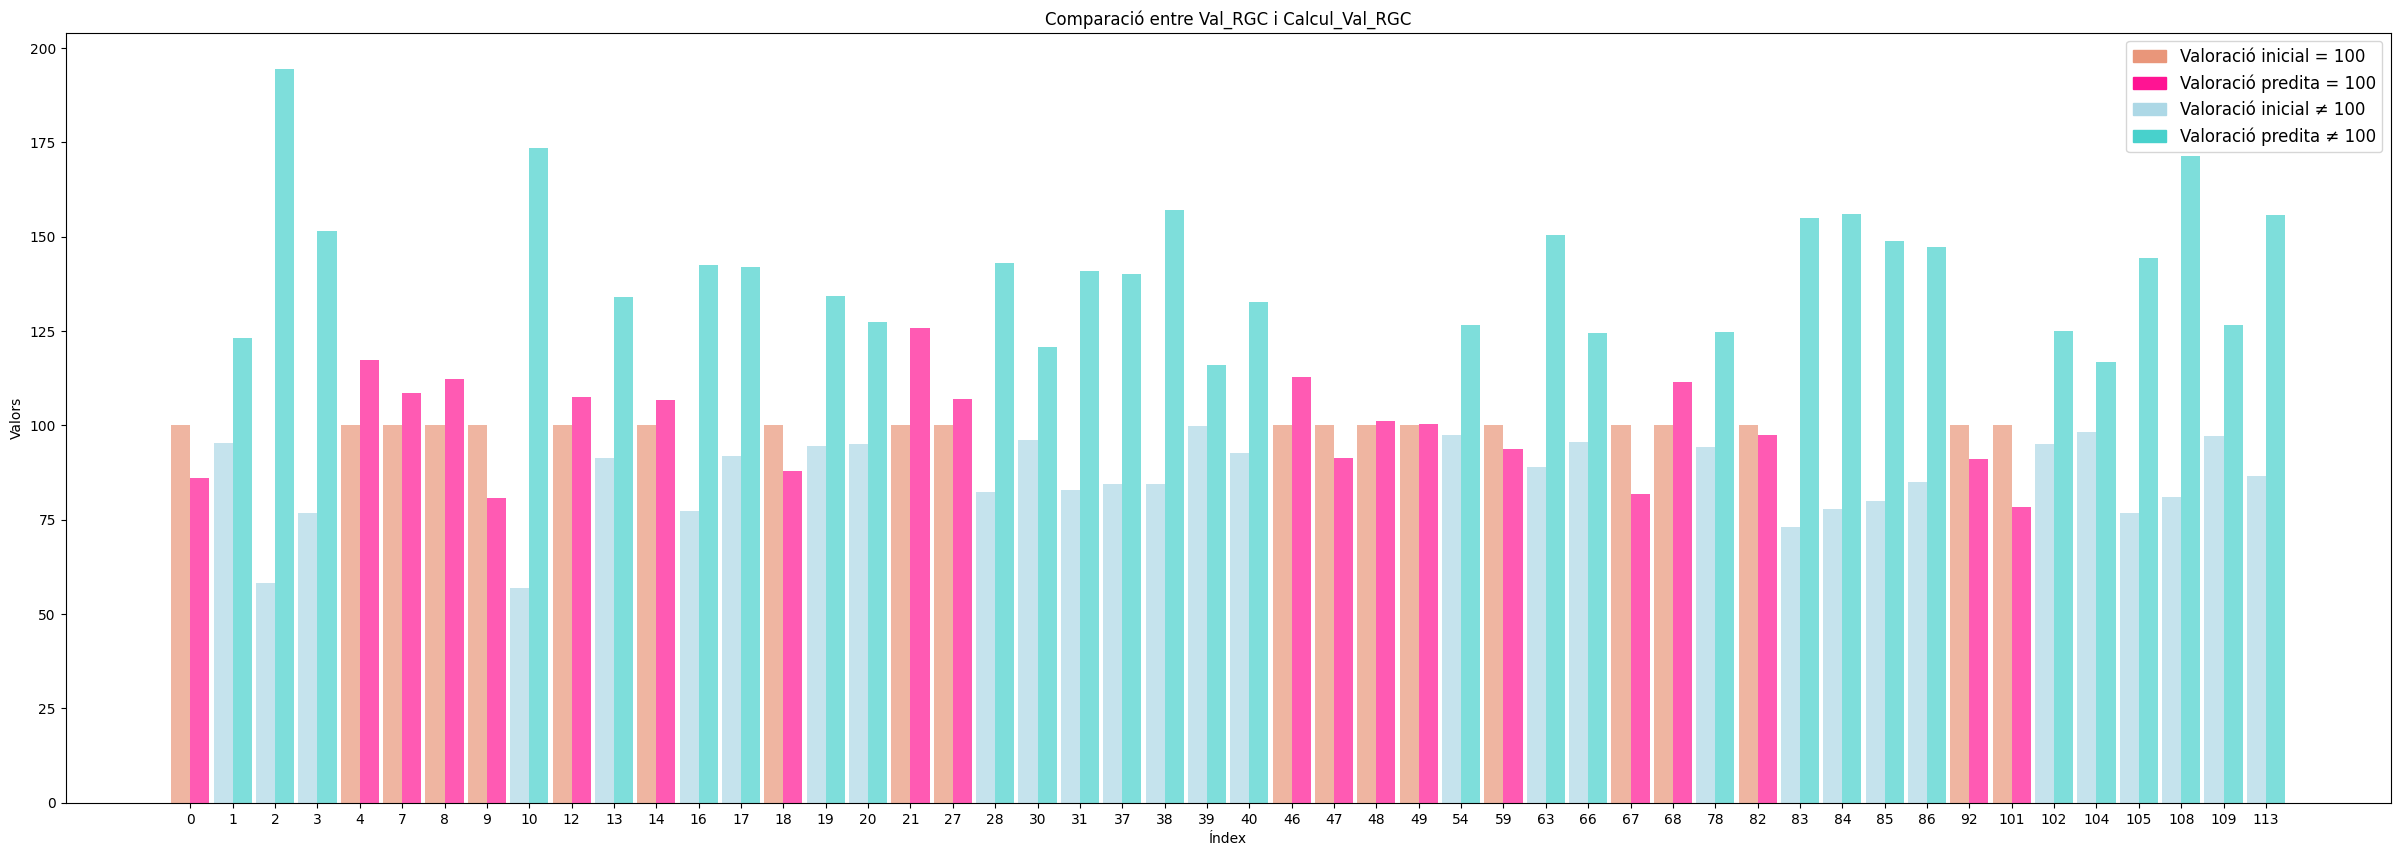

In [51]:
plt.figure(figsize=(30, 10))

ind = np.arange(len(dades_RGC))
width = 0.45  # Amplada de les barres

# Crear una llista de colors per a Val_ROA en funció de la condició
colors_val_rgc = ['darksalmon' if val == 100 else 'lightblue' for val in dades_RGC['Val_RGC']]
colors_calculo_val_rgc = ['deeppink' if val == 100 else 'mediumturquoise' for val in dades_RGC['Val_RGC']]


plt.bar(ind, dades_RGC['Val_RGC'], width, label='Val_RGC', color=colors_val_rgc, alpha=0.7)
plt.bar(ind + width, dades_RGC['Calcul_Val_RGC'], width, label='Calcul_Val_RGC', color = colors_calculo_val_rgc, alpha=0.7)

plt.xlabel('Índex')
plt.ylabel('Valors')
plt.title('Comparació entre Val_RGC i Calcul_Val_RGC')
plt.xticks(ind + width / 2, dades_RGC.index)  # Ajustar les etiquetes de l'eix x per mostrar els índexs


legend_elements = [
    Patch(facecolor='darksalmon', edgecolor='darksalmon', label='Valoració inicial = 100'),
    Patch(facecolor='deeppink', edgecolor='deeppink', label='Valoració predita = 100'),
    Patch(facecolor='lightblue', edgecolor='lightblue', label='Valoració inicial ≠ 100'),
    Patch(facecolor='mediumturquoise', edgecolor='mediumturquoise', label='Valoració predita ≠ 100')
]
plt.legend(handles=legend_elements, loc='best', prop={'size': 12})

plt.show()

In [52]:
dades_valRGC_aux=dades_valRGC[dades_valRGC['Val_RGC']!= 100].sort_values(by='Val_RGC').copy()

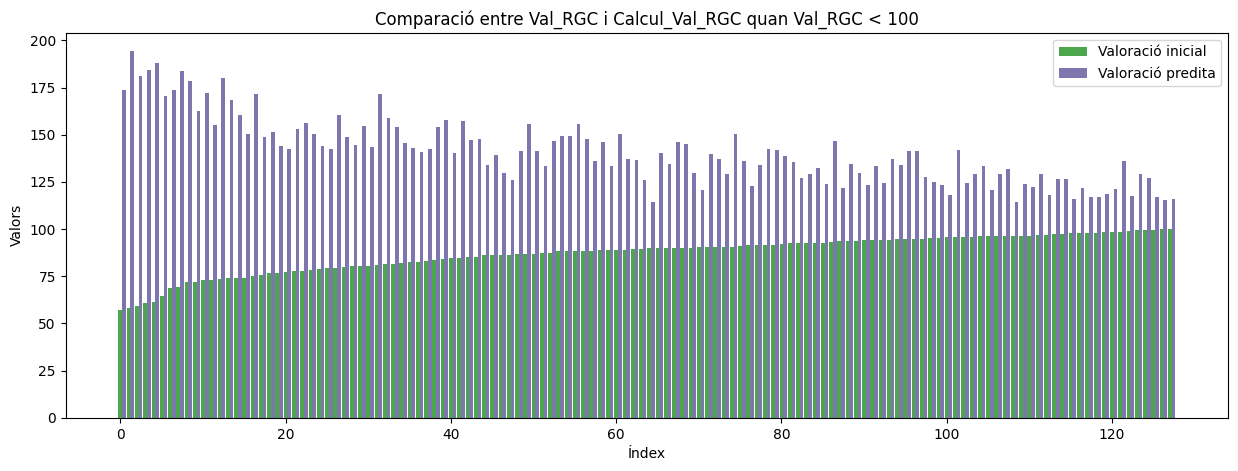

In [53]:
plt.figure(figsize=(15,5))

ind = np.arange(len(dades_valRGC_aux))
width = 0.45  # Amplada de les barres

Val_inici=plt.bar(ind, dades_valRGC_aux['Val_RGC'], width, label='Val_RGC', color='green', alpha=0.7)
val_predita=plt.bar(ind + width, dades_valRGC_aux['Calcul_Val_RGC'], width, label='Calcul_Val_RGC', color='darkslateblue', alpha=0.7)

plt.xlabel('Índex')
plt.ylabel('Valors')
plt.title('Comparació entre Val_RGC i Calcul_Val_RGC quan Val_RGC < 100')
plt.legend([Val_inici, val_predita], ['Valoració inicial', 'Valoració predita'])
plt.show()

### **Correlacions**

In [54]:
datos= {'Corrrelació val': [matrix_ROA.iloc[1][6], matrix_ROC.iloc[1][6], matrix_RGA.iloc[1][6], matrix_RGC.iloc[1][6]]}

corr = pd.DataFrame(datos)
corr.index = ['ROA', 'ROC', 'RGA', 'RGC']
corr

,Corrrelació val
ROA,-0.810862
ROC,-0.832571
RGA,-0.815730
RGC,-0.840925


# **Valors SOM, VIS, VEST**

In [55]:
dades_indices = pd.read_csv("C:/Users/Maria/OneDrive/Escritorio/4tMatCAD/TFG/TFG Maria/indices.csv", sep=",")
dades_indices.replace('-', np.nan, inplace=True)
dades_indices = dades_indices.loc[dades_indices['Edat'].isin([68, 69, 70,71, 72])]
dades_indices

,Num_Historial,Edat,Val_ROA,Val_ROC,Val_RGA,Val_RGC,Val_MARCHA,Indice_SOM,Indice_VIS,Indice_VEST,Indice_DOM,Indice_DIN
0,2022060804,68,100.0,100.0,99.076211,100.0,NaN,98.347141,96.619423,100.0,0.0,NaN
1,2022060804,69,100.0,99.169172,100.0,95.306496,NaN,97.697449,100.0,100.0,0.0,NaN
2,2022060805,69,100.0,100.0,98.814559,58.196372,NaN,100.0,97.904325,64.490641,0.0,NaN
3,2022060806,70,100.0,100.0,100.0,76.76236,NaN,100.0,100.0,80.451206,0.0,NaN
4,2022061604,70,100.0,100.0,100.0,100.0,NaN,100.0,100.0,100.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
411,TB53M,69,99.222788,100.0,100.0,100.0,NaN,100.0,100.0,100.0,0.0,NaN
412,TC53M,69,100.0,100.0,95.608636,100.0,NaN,100.0,94.843285,100.0,0.0,NaN
413,TM53M,69,97.70335,99.889611,100.0,100.0,NaN,100.0,100.0,100.0,0.0,NaN
414,VS53F,69,96.018781,97.130429,100.0,NaN,NaN,100.0,100.0,NaN,NaN,NaN


In [56]:
dades_indices['Indice_DIN'].value_counts()

Indice_DIN
94.45868    1
Name: count, dtype: int64

In [57]:
dades_indices['Indice_DOM'].value_counts()

Indice_DOM
0.0    298
Name: count, dtype: int64

In [58]:
dades_indices = dades_indices.drop(['Indice_DOM','Indice_DIN'], axis=1)

In [59]:
dades_indices['Calcul_Val_ROA']= dades_valROA['Calcul_Val_ROA'] 
dades_indices['Calcul_Val_ROC']= dades_valROC['Calcul_Val_ROC'] 
dades_indices['Calcul_Val_RGA']= dades_valRGA['Calcul_Val_RGA'] 
dades_indices['Calcul_Val_RGC']= dades_valRGC['Calcul_Val_RGC'] 
dades_indices

,Num_Historial,Edat,Val_ROA,Val_ROC,Val_RGA,Val_RGC,Val_MARCHA,Indice_SOM,Indice_VIS,Indice_VEST,Calcul_Val_ROA,Calcul_Val_ROC,Calcul_Val_RGA,Calcul_Val_RGC
0,2022060804,68,100.0,100.0,99.076211,100.0,NaN,98.347141,96.619423,100.0,94.821808,112.921559,126.992153,85.927386
1,2022060804,69,100.0,99.169172,100.0,95.306496,NaN,97.697449,100.0,100.0,117.942162,143.337546,111.313355,123.192309
2,2022060805,69,100.0,100.0,98.814559,58.196372,NaN,100.0,97.904325,64.490641,124.677715,81.228813,139.802547,194.344154
3,2022060806,70,100.0,100.0,100.0,76.76236,NaN,100.0,100.0,80.451206,53.029236,45.389096,81.487492,151.503113
4,2022061604,70,100.0,100.0,100.0,100.0,NaN,100.0,100.0,100.0,102.368422,77.723395,107.488487,117.418137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,TB53M,69,99.222788,100.0,100.0,100.0,NaN,100.0,100.0,100.0,158.929232,118.959684,115.378348,83.909788
412,TC53M,69,100.0,100.0,95.608636,100.0,NaN,100.0,94.843285,100.0,132.034159,134.795435,155.145379,109.006758
413,TM53M,69,97.70335,99.889611,100.0,100.0,NaN,100.0,100.0,100.0,156.252045,138.258024,100.247708,116.865151
414,VS53F,69,96.018781,97.130429,100.0,NaN,NaN,100.0,100.0,NaN,174.945796,166.676820,113.847012,NaN


In [61]:
df_valoraciones = pd.DataFrame()

df_valoraciones['SOM'] = (dades_indices['Calcul_Val_ROC'] / dades_indices['Calcul_Val_ROA']) * 100
df_valoraciones['VIS'] = (dades_indices['Calcul_Val_RGA'] / dades_indices['Calcul_Val_ROA']) * 100
df_valoraciones['VEST'] = (dades_indices['Calcul_Val_RGC'] / dades_indices['Calcul_Val_ROA']) * 100

Comparem els valors predits (SOM, VIS I VEST) amb els valors originals (Indice_SOM	Indice_VIS	Indice_VEST)

In [62]:
orig= dades_indices.iloc[:, 7:10]
result = pd.concat([df_valoraciones, orig], axis=1)
result

,SOM,VIS,VEST,Indice_SOM,Indice_VIS,Indice_VEST
0,119.088173,133.927158,90.619856,98.347141,96.619423,100.0
1,121.532066,94.379612,104.451459,97.697449,100.0,100.0
2,65.151028,112.131142,155.877218,100.0,97.904325,64.490641
3,85.592588,153.665219,285.697331,100.0,100.0,80.451206
4,75.925167,105.001606,114.701521,100.0,100.0,100.0
...,...,...,...,...,...,...
411,74.850726,72.597310,52.796951,100.0,100.0,100.0
412,102.091335,117.503970,82.559513,100.0,94.843285,100.0
413,88.483977,64.157693,74.792718,100.0,100.0,100.0
414,95.273407,65.075592,NaN,100.0,100.0,NaN


In [63]:
datos = {'Corrrelació': [result[['SOM', 'Indice_SOM']].corr().iloc[0, 1], result[['VIS', 'Indice_VIS']].corr().iloc[0, 1], result[['VEST', 'Indice_VEST']].corr().iloc[0, 1]]}

corr = pd.DataFrame(datos)
corr.index = ['SOM', 'VIS', 'VEST']
corr

,Corrrelació
SOM,-0.742099
VIS,-0.628527
VEST,-0.489203


# **Xarxa neuronal RNN per predir les valoracions**

In [64]:
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

### **ROA**

In [65]:
dades_valROA = pd.read_csv("C:/Users/Maria/OneDrive/Escritorio/4tMatCAD/TFG/TFG Maria/VAL_ROA.csv", sep=",")
dades_valROA = dades_valROA.dropna().sort_values(by='Edad')

# No tenim suficients casos de les altres edats
dades_valROA = dades_valROA.loc[dades_valROA['Edad'].isin([68, 69, 70, 71, 72])]
dades_valROA

,Edad,Val_ROA,Despl_ML1,Despl_AP1,Despl_ML2,Despl_AP2
142,68,99.008882,24.680000,34.120000,13.480000,15.750000
144,68,100.0,19.870000,20.590000,14.240000,19.030000
160,68,100.0,16.480000,24.550000,13.210000,14.940000
159,68,98.387839,18.220000,23.000000,21.800000,31.950000
366,68,100.0,12.259061,21.494609,17.654919,19.954628
...,...,...,...,...,...,...
238,72,100.0,10.918305,14.666683,12.766134,23.399029
236,72,97.343751,23.000000,27.030000,27.800000,25.390000
232,72,100.0,11.020000,12.650000,12.480000,14.200000
214,72,97.956966,19.240000,23.620000,18.200000,28.180000


In [66]:
X = dades_valROA.drop('Val_ROA', axis=1).values
y= dades_valROA['Val_ROA'].values

In [67]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

In [68]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.Dense(1)])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=100, batch_size=32, verbose=1)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.5777
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2180 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1317 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0914 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0860 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0700 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0657 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0566 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0499 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0434 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0373 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0311 
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0256 
Epoch 14/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0205 
Epoch 15/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0163 
Epoch 16/100
7/7 ━━━

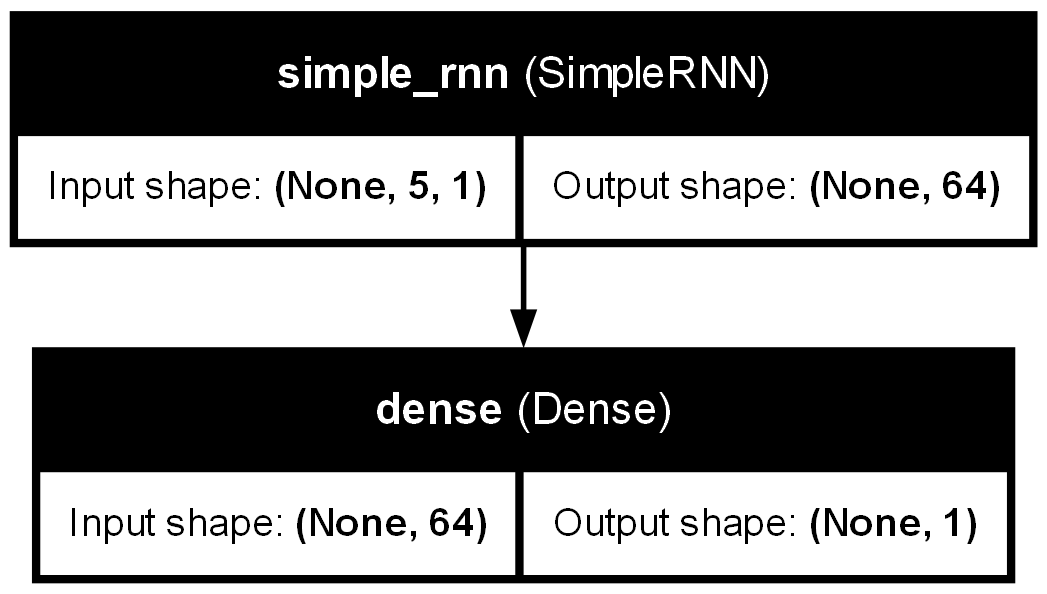

In [69]:
# diagrama RNN
plot_model(model, to_file='rnn_model.png', show_shapes=True, show_layer_names=True)

In [70]:
loss_ROA = model.evaluate(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 2.3023e-04   


In [71]:
predictions_scaled = model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))

predictions = scaler.inverse_transform(predictions_scaled)
y_test_original = scaler.inverse_transform(y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step


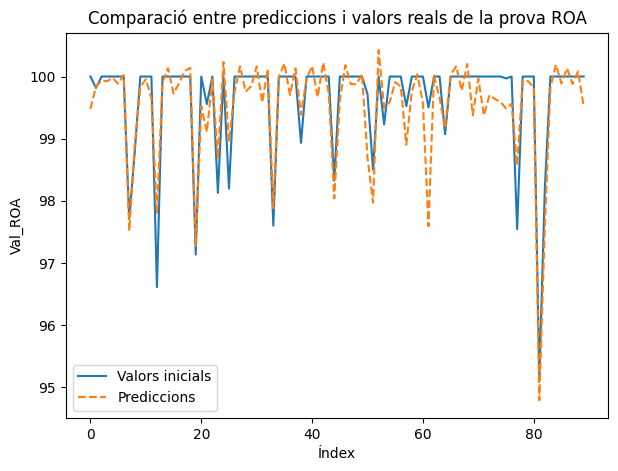

In [72]:
plt.figure(figsize=(7, 5))
plt.plot(y_test_original, label='Valors inicials')
plt.plot(predictions, label='Prediccions', linestyle='--')
plt.xlabel('Índex')
plt.ylabel('Val_ROA')
plt.title('Comparació entre prediccions i valors reals de la prova ROA')
plt.legend()
plt.show()

In [73]:
predictions_flat = predictions.flatten()
y_test_original_flat = y_test_original.flatten()

correlation_ROA = np.corrcoef(predictions_flat, y_test_original_flat)[0, 1]
mse_ROA = mean_squared_error(predictions, y_test_original)

## **ROC**

In [74]:
dades_valROC = pd.read_csv("C:/Users/Maria/OneDrive/Escritorio/4tMatCAD/TFG/TFG Maria/VAL_ROC.csv", sep=",")
dades_valROC = dades_valROC.dropna().sort_values(by='Edad')

# No tenim suficients casos de les altres edats
dades_valROC = dades_valROC.loc[dades_valROC['Edad'].isin([68, 69, 70, 71,72])]

In [75]:
X = dades_valROC.drop('Val_ROC', axis=1).values
y= dades_valROC['Val_ROC'].values

In [76]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.23, random_state=42)

In [77]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.Dense(1)])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100


C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6561
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2170 
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1446 
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0885 
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0863 
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0712 
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0642 
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0529 
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0446 
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0355 
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0273 
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0209 
Epoch 13/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0154 
Epoch 14/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 
Epoch 15/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0080 
Epoch 16/100
8/8 ━━━━━━━━━━━━━━━

In [78]:
loss_ROC = model.evaluate(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2451e-04  


In [79]:
predictions_scaled = model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))

predictions = scaler.inverse_transform(predictions_scaled)
y_test_original = scaler.inverse_transform(y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step


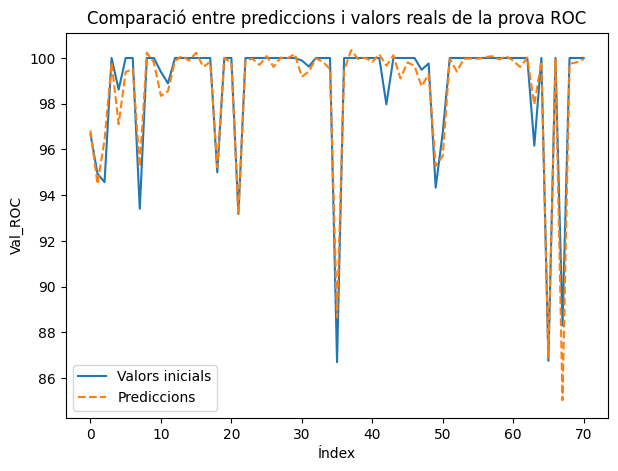

In [80]:
plt.figure(figsize=(7, 5))
plt.plot(y_test_original, label='Valors inicials')
plt.plot(predictions, label='Prediccions', linestyle='--')
plt.xlabel('Índex')
plt.ylabel('Val_ROC')
plt.title('Comparació entre prediccions i valors reals de la prova ROC')
plt.legend()
plt.show()

In [81]:
predictions_flat = predictions.flatten()
y_test_original_flat = y_test_original.flatten()

correlation_ROC = np.corrcoef(predictions_flat, y_test_original_flat)[0, 1]
mse_ROC = mean_squared_error(predictions, y_test_original)

## **RGA**

In [82]:
dades_valRGA = pd.read_csv("C:/Users/Maria/OneDrive/Escritorio/4tMatCAD/TFG/TFG Maria/VAL_RGA.csv", sep=",")
dades_valRGA = dades_valRGA.dropna().sort_values(by='Edad')

# No tenim suficients casos de les altres edats
dades_valRGA = dades_valRGA.loc[dades_valRGA['Edad'].isin([68, 69, 70, 71,72])]

In [83]:
X = dades_valRGA.drop('Val_RGA', axis=1).values
y= dades_valRGA['Val_RGA'].values

In [84]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.23, random_state=42)

In [85]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.Dense(1)])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100


C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.9617
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6981 
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4446 
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1640 
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1532 
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1019 
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0946 
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0809 
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0776 
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0682 
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0613 
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0558 
Epoch 13/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0496 
Epoch 14/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0432 
Epoch 15/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0375 
Epoch 16/100
8/8 ━━━━━━━━━━━━━━━

In [86]:
loss_RGA = model.evaluate(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0026  


In [87]:
predictions_scaled = model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))

predictions = scaler.inverse_transform(predictions_scaled)
y_test_original = scaler.inverse_transform(y_test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000025C0601DC60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step


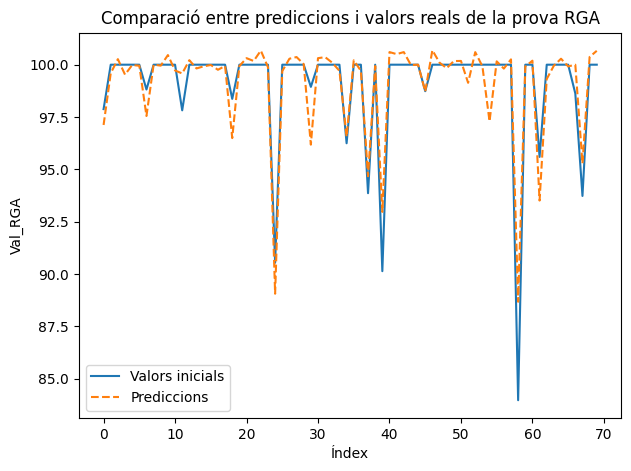

In [88]:
plt.figure(figsize=(7, 5))
plt.plot(y_test_original, label='Valors inicials')
plt.plot(predictions, label='Prediccions', linestyle='--')
plt.xlabel('Índex')
plt.ylabel('Val_RGA')
plt.title('Comparació entre prediccions i valors reals de la prova RGA')
plt.legend()
plt.show()

In [89]:
predictions_flat = predictions.flatten()
y_test_original_flat = y_test_original.flatten()

correlation_RGA = np.corrcoef(predictions_flat, y_test_original_flat)[0, 1]
mse_RGA = mean_squared_error(predictions, y_test_original)

## **RGC**

In [90]:
dades_valRGC = pd.read_csv("C:/Users/Maria/OneDrive/Escritorio/4tMatCAD/TFG/TFG Maria/VAL_RGC.csv", sep=",")
dades_valRGC = dades_valRGC.dropna().sort_values(by='Edad')
dades_valRGC = dades_valRGC[dades_valRGC['Val_RGC'] != '0.0']

# No tenim suficients casos de les altres edats
dades_valRGC = dades_valRGC.loc[dades_valRGC['Edad'].isin([68,69, 70, 71,72])]

In [91]:
X = dades_valRGC.drop('Val_RGC', axis=1).values
y= dades_valRGC['Val_RGC'].values

In [92]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

In [93]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.Dense(1)])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100


C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7451
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5157 
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3038 
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1505 
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1711 
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1354 
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1235 
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1153 
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1019 
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0907 
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0773 
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0639 
Epoch 13/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 0.0497
Epoch 14/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0389 
Epoch 15/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0304 
Epoch 16/100
6/6 ━━━━━━━━━━━━━━

In [94]:
loss_RGC = model.evaluate(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0069  


In [95]:
predictions_scaled = model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))

predictions = scaler.inverse_transform(predictions_scaled)
y_test_original = scaler.inverse_transform(y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step


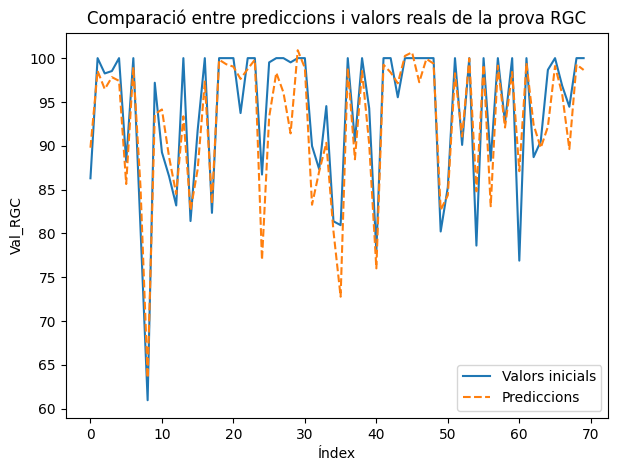

In [96]:
plt.figure(figsize=(7, 5))
plt.plot(y_test_original, label='Valors inicials')
plt.plot(predictions, label='Prediccions', linestyle='--')
plt.xlabel('Índex')
plt.ylabel('Val_RGC')
plt.title('Comparació entre prediccions i valors reals de la prova RGC')
plt.legend()
plt.show()

In [97]:
predictions_flat = predictions.flatten()
y_test_original_flat = y_test_original.flatten()

correlation_RGC = np.corrcoef(predictions_flat, y_test_original_flat)[0, 1]
mse_RGC = mean_squared_error(predictions, y_test_original)

Guardem els resultats de les mètriques:

In [98]:
# Per guardar els resultats finals
resultats_rnn = pd.DataFrame({'Corrrelació': [correlation_ROA, correlation_ROC, correlation_RGA, correlation_RGC],
                              'Loss': [loss_ROA, loss_ROC, loss_RGA, loss_RGC],
                               'MSE': [mse_ROA, mse_ROC, mse_RGA, mse_RGC]})
resultats_rnn.index = ['ROA', 'ROC', 'RGA','RGC']
resultats_rnn

,Corrrelació,Loss,MSE
ROA,0.898276,0.000244,0.162543
ROC,0.969389,0.000369,0.537482
RGA,0.927867,0.002895,1.025174
RGC,0.914730,0.006597,12.249689


# **Regresion multiclasse per predir l'edat dels pacients**

### **ROA**

In [99]:
regressio_roa = pd.read_csv("C:/Users/Maria/OneDrive/Escritorio/4tMatCAD/TFG/TFG Maria/regressio_ROA.csv", sep=",")
regressio_roa

,Num Historial,Desplaz.Total(mm),Angulo Desplaz.,Dispers ML (mm),Dispers AP (mm),Area barrida (mm2),Velocidad media (m/s),Desplazam.ML (mm),Desplazam.AP(mm),Fuerza Max ML (N),Fuerza Max AP (N),Edat
0,2022060804,10.711343,121.193822,2.160846,3.423843,28.318071,0.011127,10.025,19.945,6.810,9.015,68
1,2022060804,2.987212,195.174367,4.085043,2.556906,41.396307,0.009592,19.960,14.765,6.180,5.145,69
2,2022060805,7.042813,237.778397,2.092307,3.641859,28.746317,0.008734,15.045,23.805,6.700,4.525,69
3,2022060806,15.100835,157.081568,1.341846,1.689850,8.986748,0.008093,6.835,8.620,2.140,2.095,70
4,2022061604,3.544186,244.618640,2.623682,4.069365,34.647320,0.005862,11.870,18.470,4.200,2.980,70
...,...,...,...,...,...,...,...,...,...,...,...,...
380,TB53M,57.872024,244.338943,3.661599,4.591069,64.546874,0.018785,23.005,24.735,19.020,12.680,69
381,TC53M,25.879431,282.841705,3.048592,4.610214,57.399757,0.011505,18.140,21.710,7.575,5.905,69
382,TM53M,52.326920,273.118281,2.407490,10.909842,98.962047,0.009593,12.085,38.505,8.965,4.860,69
383,VS53F,45.771492,261.752445,3.909921,6.123829,82.950036,0.015078,20.105,34.530,7.935,7.520,69


In [100]:
regressio_roa = regressio_roa.loc[regressio_roa['Edat'].isin([68, 69, 70])]

In [101]:
X = regressio_roa.drop(columns=['Edat','Num Historial']).values
y = regressio_roa['Edat'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42)

In [102]:
model = LogisticRegression(max_iter=1000, multi_class='multinomial')
model.fit(X_train, y_train)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [103]:
y_pred = model.predict(X_test)

accuracy_ROA = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_ROA)

Accuracy: 0.6363636363636364


In [106]:
resultados = pd.DataFrame({'Real': y_test, 'Prediccion': y_pred})

### **ROC**

In [109]:
regressio_roc = pd.read_csv("C:/Users/Maria/OneDrive/Escritorio/4tMatCAD/TFG/TFG Maria/Regressio_ROC.csv", sep=",")
regressio_roc = regressio_roc.loc[regressio_roc['Edat'].isin([68, 69, 70])]

In [110]:
X = regressio_roc.drop(columns=['Edat','Num Historial']).values
y = regressio_roc['Edat'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [111]:
model = LogisticRegression(max_iter=1000, multi_class='multinomial')
model.fit(X_train, y_train)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [112]:
y_pred = model.predict(X_test)

accuracy_ROC = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_ROC)

Accuracy: 0.4375


In [113]:
resultados = pd.DataFrame({'Real': y_test, 'Prediccion': y_pred})

### **RGA**

In [114]:
regressio_rga = pd.read_csv("C:/Users/Maria/OneDrive/Escritorio/4tMatCAD/TFG/TFG Maria/regressio_RGA.csv", sep=",")
regressio_rga = regressio_rga.loc[regressio_rga['Edat'].isin([68, 69, 70])]

In [115]:
X = regressio_rga.drop(columns=['Edat','Num Historial']).values
y = regressio_rga['Edat'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)


In [116]:
model = LogisticRegression(max_iter=1000, multi_class='multinomial')
model.fit(X_train, y_train)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [117]:
y_pred = model.predict(X_test)

accuracy_RGA = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_RGA)

Accuracy: 0.4342105263157895


In [118]:
resultados = pd.DataFrame({'Real': y_test, 'Prediccion': y_pred})

### **RGC**

In [119]:
regressio_rgc = pd.read_csv("C:/Users/Maria/OneDrive/Escritorio/4tMatCAD/TFG/TFG Maria/regressio_RGC.csv", sep=",")
regressio_rgc = regressio_rgc.loc[regressio_rgc['Edat'].isin([68, 69, 70])]

In [120]:
X = regressio_rgc.drop(columns=['Edat','Num Historial']).values
y = regressio_rgc['Edat'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.26, random_state=42)

In [121]:
model = LogisticRegression(max_iter=1000, multi_class='multinomial')
model.fit(X_train, y_train)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [122]:
y_pred = model.predict(X_test)

accuracy_RGC = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_RGC)

Accuracy: 0.40476190476190477


In [123]:
resultados = pd.DataFrame({'Real': y_test, 'Prediccion': y_pred})

Guardem els accuracys de cada prova:

In [124]:
resultats_regressio = pd.DataFrame({'Accuracy': [accuracy_ROA, accuracy_ROC, accuracy_RGA, accuracy_RGC]})
resultats_regressio.index = ['ROA', 'ROC', 'RGA','RGC']
resultats_regressio

,Accuracy
ROA,0.636364
ROC,0.437500
RGA,0.434211
RGC,0.404762


# **Xarxa neuronal RNN per predir les edats**

In [125]:
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

### **ROA**

In [126]:
dades_valROA = pd.read_csv("C:/Users/Maria/OneDrive/Escritorio/4tMatCAD/TFG/TFG Maria/VAL_ROA.csv", sep=",")
dades_valROA = dades_valROA.dropna().sort_values(by='Edad')
dades_valROA

,Edad,Val_ROA,Despl_ML1,Despl_AP1,Despl_ML2,Despl_AP2
197,24,100.0,13.890000,14.660000,9.380000,13.930000
43,26,95.629845,14.230000,36.460000,11.000000,33.900000
230,27,100.0,11.390000,16.860000,7.450000,15.610000
217,28,100.0,9.650000,27.110000,5.840000,13.390000
175,28,100.0,11.120000,13.620000,15.220000,12.000000
...,...,...,...,...,...,...
236,72,97.343751,23.000000,27.030000,27.800000,25.390000
232,72,100.0,11.020000,12.650000,12.480000,14.200000
214,72,97.956966,19.240000,23.620000,18.200000,28.180000
273,72,100.0,19.670388,18.653704,8.850149,15.764878


In [127]:
X = dades_valROA.drop('Edad', axis=1).values
y = dades_valROA['Edad'].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [128]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(LSTM(50, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(1))

# Compilar el model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Entrenar el model
history = model.fit(X_train, y_train, epochs=300, batch_size=16, validation_split=0.2, verbose=2)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/300
16/16 - 10s - 594ms/step - loss: 4400.9570 - val_loss: 4306.5381
Epoch 2/300
16/16 - 0s - 13ms/step - loss: 4378.2485 - val_loss: 4275.7212
Epoch 3/300
16/16 - 0s - 14ms/step - loss: 4330.5532 - val_loss: 4205.6118
Epoch 4/300
16/16 - 0s - 12ms/step - loss: 4207.5532 - val_loss: 4020.2808
Epoch 5/300
16/16 - 0s - 15ms/step - loss: 3881.6094 - val_loss: 3523.2510
Epoch 6/300
16/16 - 0s - 13ms/step - loss: 3295.4819 - val_loss: 2674.0535
Epoch 7/300
16/16 - 0s - 11ms/step - loss: 2427.1121 - val_loss: 2191.5352
Epoch 8/300
16/16 - 0s - 11ms/step - loss: 2104.0574 - val_loss: 1845.1224
Epoch 9/300
16/16 - 0s - 10ms/step - loss: 1711.6417 - val_loss: 1421.9390
Epoch 10/300
16/16 - 0s - 12ms/step - loss: 1335.3507 - val_loss: 946.8134
Epoch 11/300
16/16 - 0s - 14ms/step - loss: 889.9139 - val_loss: 532.0421
Epoch 12/300
16/16 - 0s - 15ms/step - loss: 631.7972 - val_loss: 305.2313
Epoch 13/300
16/16 - 0s - 12ms/step - loss: 496.9175 - val_loss: 214.0593
Epoch 14/300
16/16 - 0s - 

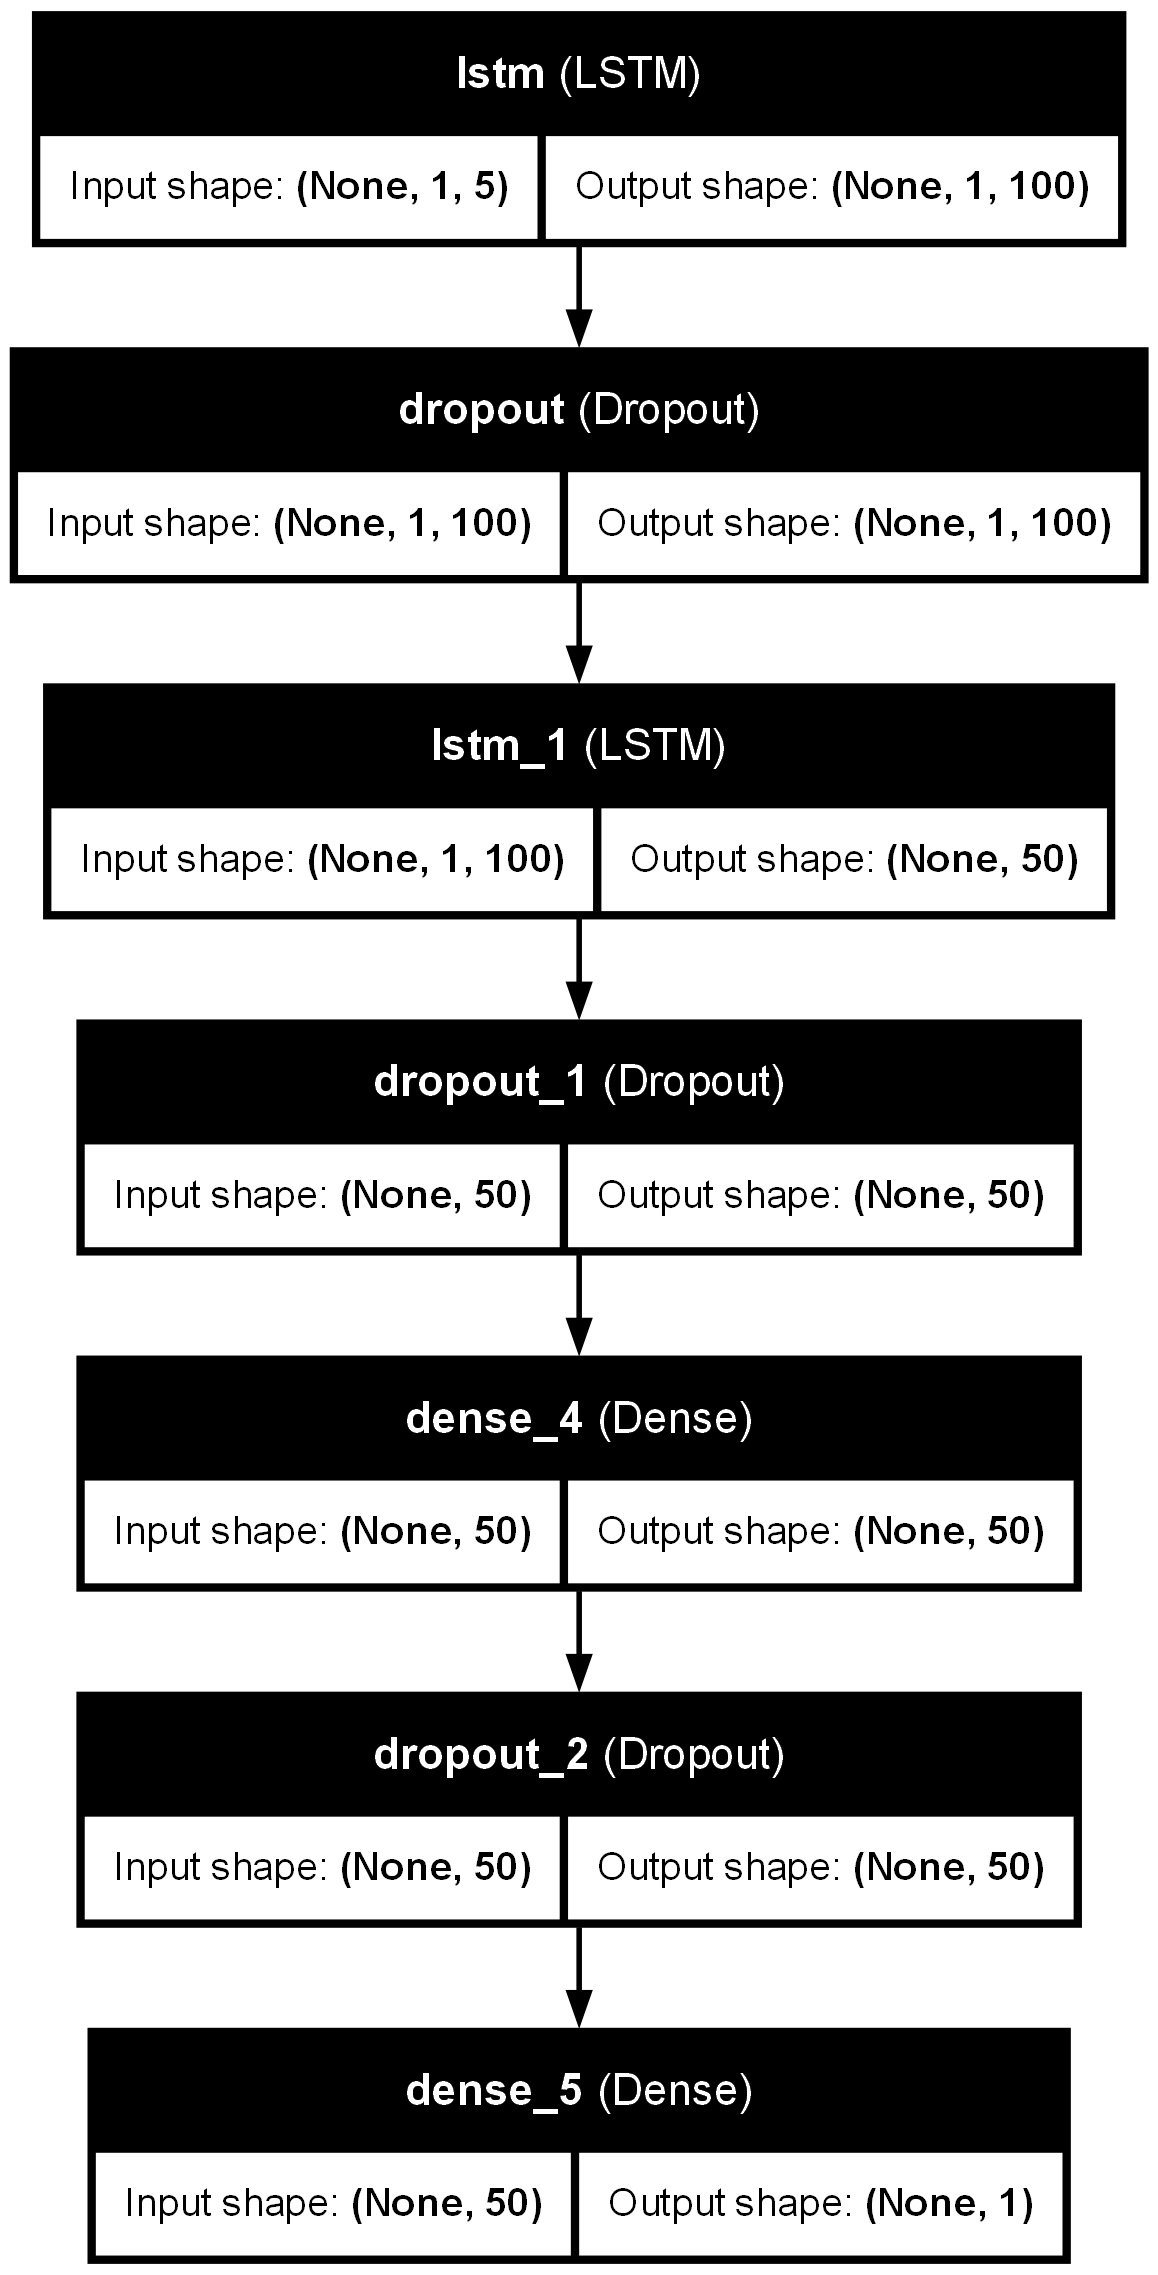

In [129]:
# diagrama RNN
plot_model(model, to_file='rnn_model_edats.png', show_shapes=True, show_layer_names=True)

In [130]:
# Avaluar el model
loss_ROA = model.evaluate(X_test, y_test, verbose=2)

y_pred = model.predict(X_test)
mse_ROA = mean_squared_error(y_test, y_pred)
mae_ROA = mean_absolute_error(y_test, y_pred)

3/3 - 0s - 19ms/step - loss: 164.5810
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 334ms/step


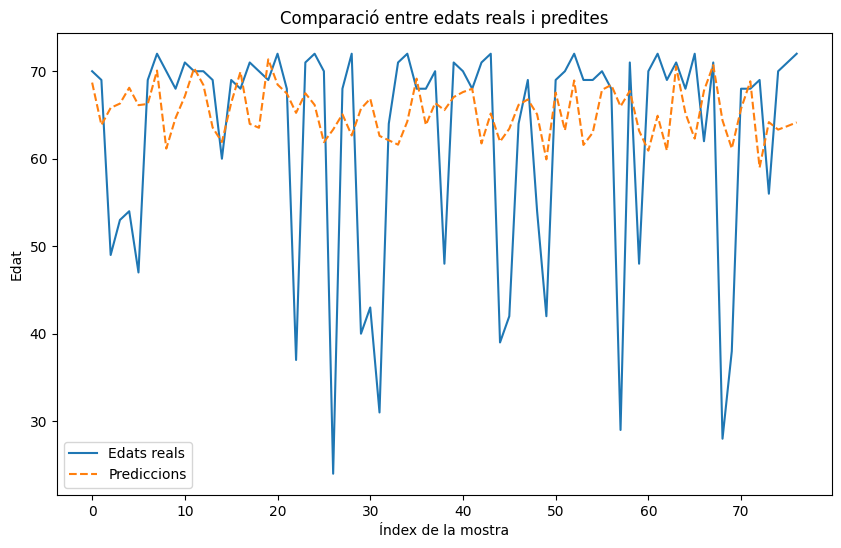

In [131]:
# Visualització de les prediccions vs valors reals
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Edats reals')
plt.plot(y_pred, label='Prediccions', linestyle='--')
plt.xlabel('Índex de la mostra')
plt.ylabel('Edat')
plt.title('Comparació entre edats reals i predites')
plt.legend()
plt.show()

In [132]:
# Correlació entre les prediccions i els valors originals
predictions_flat = y_pred.flatten()
y_test_original_flat = y_test.flatten()
correlation_ROA = np.corrcoef(predictions_flat, y_test)[0, 1]
print("Correlació entre les prediccions i els valors originals:", correlation_ROA)

Correlació entre les prediccions i els valors originals: 0.2181911946895333


### **ROC**

In [133]:
dades_valROC = pd.read_csv("C:/Users/Maria/OneDrive/Escritorio/4tMatCAD/TFG/TFG Maria/VAL_ROC.csv", sep=",")
dades_valROC = dades_valROC.dropna().sort_values(by='Edad')

X = dades_valROC.drop('Edad', axis=1).values
y = dades_valROC['Edad'].values
dades_valROC

,Edad,Val_ROC,Despl_ML1,Despl_AP1,Despl_ML2,Despl_AP2
197,24,96.016538,33.620000,23.070000,25.540000,25.040000
43,26,92.915904,32.240000,36.150000,28.460000,34.650000
230,27,100.0,13.890000,25.570000,12.860000,17.360000
377,27,96.216791,15.880000,38.240000,19.770000,33.780000
217,28,99.73775,16.450000,29.430000,12.380000,21.320000
...,...,...,...,...,...,...
300,72,100.0,15.460000,20.240000,11.250000,12.750000
292,72,100.0,12.400000,11.970000,10.030000,14.190000
286,72,94.233676,35.920000,35.860000,47.730000,45.860000
261,72,100.0,13.920000,15.550000,10.070000,15.410000


In [134]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [135]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(LSTM(50, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(1))

# Compilar el model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Entrenar el model
history = model.fit(X_train, y_train, epochs=300, batch_size=16, validation_split=0.2, verbose=2)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/300
16/16 - 9s - 580ms/step - loss: 4412.0815 - val_loss: 4298.5098
Epoch 2/300
16/16 - 0s - 12ms/step - loss: 4376.1807 - val_loss: 4252.7998
Epoch 3/300
16/16 - 0s - 14ms/step - loss: 4296.1392 - val_loss: 4142.7510
Epoch 4/300
16/16 - 0s - 12ms/step - loss: 4062.9214 - val_loss: 3836.7148
Epoch 5/300
16/16 - 0s - 15ms/step - loss: 3577.8777 - val_loss: 3118.9495
Epoch 6/300
16/16 - 0s - 10ms/step - loss: 2684.9065 - val_loss: 2175.5432
Epoch 7/300
16/16 - 0s - 11ms/step - loss: 2308.0662 - val_loss: 1851.0612
Epoch 8/300
16/16 - 0s - 11ms/step - loss: 2047.7175 - val_loss: 1701.5714
Epoch 9/300
16/16 - 0s - 11ms/step - loss: 1714.6782 - val_loss: 1416.3278
Epoch 10/300
16/16 - 0s - 11ms/step - loss: 1593.0834 - val_loss: 1175.2721
Epoch 11/300
16/16 - 0s - 11ms/step - loss: 1240.2488 - val_loss: 874.8939
Epoch 12/300
16/16 - 0s - 11ms/step - loss: 958.9481 - val_loss: 582.8806
Epoch 13/300
16/16 - 0s - 12ms/step - loss: 681.6407 - val_loss: 377.5236
Epoch 14/300
16/16 - 0s -

In [136]:
# Avaluar el model
loss_ROC = model.evaluate(X_test, y_test, verbose=2)

y_pred = model.predict(X_test)
mse_ROC = mean_squared_error(y_test, y_pred)
mae_ROC = mean_absolute_error(y_test, y_pred)

3/3 - 0s - 21ms/step - loss: 132.4322
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 329ms/step


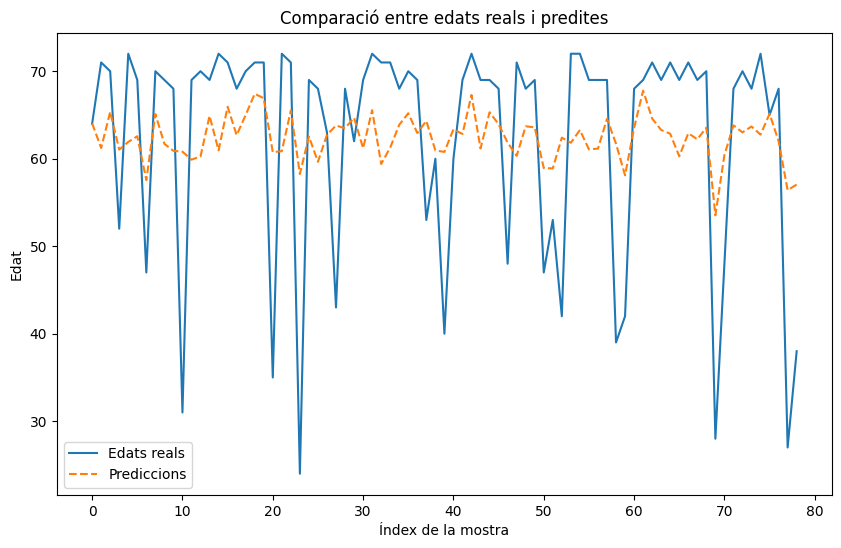

In [137]:
# Visualització de les prediccions vs valors reals
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Edats reals')
plt.plot(y_pred, label='Prediccions', linestyle='--')
plt.xlabel('Índex de la mostra')
plt.ylabel('Edat')
plt.title('Comparació entre edats reals i predites')
plt.legend()
plt.show()

In [138]:
# Correlació entre les prediccions i els valors originals
predictions_flat = y_pred.flatten()
y_test_original_flat = y_test.flatten()
correlation_ROC = np.corrcoef(predictions_flat, y_test)[0, 1]
print("Correlació entre les prediccions i els valors originals:", correlation_ROC)

Correlació entre les prediccions i els valors originals: 0.5884121866057566


### **RGA**

In [139]:
dades_valRGA = pd.read_csv("C:/Users/Maria/OneDrive/Escritorio/4tMatCAD/TFG/TFG Maria/VAL_RGA.csv", sep=",")
dades_valRGA = dades_valRGA.dropna().sort_values(by='Edad')

X = dades_valRGA.drop('Edad', axis=1).values
y = dades_valRGA['Edad'].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [140]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(LSTM(50, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(1))

# Compilar el model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Entrenar el model
history = model.fit(X_train, y_train, epochs=300, batch_size=16, validation_split=0.2, verbose=2)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/300
16/16 - 10s - 622ms/step - loss: 4396.6880 - val_loss: 4285.7134
Epoch 2/300
16/16 - 0s - 11ms/step - loss: 4372.4639 - val_loss: 4252.6045
Epoch 3/300
16/16 - 0s - 14ms/step - loss: 4323.9609 - val_loss: 4176.7031
Epoch 4/300
16/16 - 0s - 11ms/step - loss: 4191.2944 - val_loss: 3958.0076
Epoch 5/300
16/16 - 0s - 13ms/step - loss: 3868.0564 - val_loss: 3370.5645
Epoch 6/300
16/16 - 0s - 13ms/step - loss: 3015.5652 - val_loss: 2633.5251
Epoch 7/300
16/16 - 0s - 13ms/step - loss: 2433.8328 - val_loss: 2035.5033
Epoch 8/300
16/16 - 0s - 16ms/step - loss: 1777.6583 - val_loss: 1713.9810
Epoch 9/300
16/16 - 0s - 17ms/step - loss: 1578.3187 - val_loss: 1408.0005
Epoch 10/300
16/16 - 0s - 13ms/step - loss: 1428.8536 - val_loss: 1076.0935
Epoch 11/300
16/16 - 0s - 13ms/step - loss: 1033.9226 - val_loss: 764.7924
Epoch 12/300
16/16 - 0s - 14ms/step - loss: 658.4169 - val_loss: 514.5446
Epoch 13/300
16/16 - 0s - 13ms/step - loss: 545.0359 - val_loss: 368.9760
Epoch 14/300
16/16 - 0s 

In [141]:
# Avaluar el model
loss_RGA = model.evaluate(X_test, y_test, verbose=2)

y_pred = model.predict(X_test)
mse_RGA = mean_squared_error(y_test, y_pred)
mae_RGA = mean_absolute_error(y_test, y_pred)

3/3 - 0s - 20ms/step - loss: 133.3858
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 369ms/step


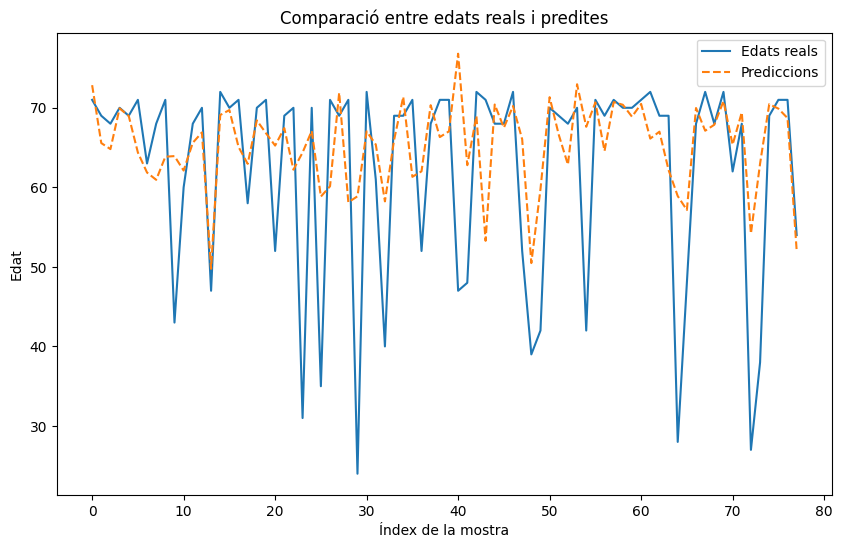

In [142]:
# Visualització de les prediccions vs valors reals
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Edats reals')
plt.plot(y_pred, label='Prediccions', linestyle='--')
plt.xlabel('Índex de la mostra')
plt.ylabel('Edat')
plt.title('Comparació entre edats reals i predites')
plt.legend()
plt.show()

In [143]:
# Correlació entre les prediccions i els valors originals
predictions_flat = y_pred.flatten()
y_test_original_flat = y_test.flatten()
correlation_RGA = np.corrcoef(predictions_flat, y_test)[0, 1]
print("Correlació entre les prediccions i els valors originals:", correlation_RGA)

Correlació entre les prediccions i els valors originals: 0.5344039584224068


### **RGC**

In [144]:
dades_valRGC = pd.read_csv("C:/Users/Maria/OneDrive/Escritorio/4tMatCAD/TFG/TFG Maria/VAL_RGC.csv", sep=",")
dades_valRGC = dades_valRGC.dropna().sort_values(by='Edad')

X = dades_valRGC.drop('Edad', axis=1).values
y = dades_valRGC['Edad'].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [145]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(LSTM(50, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(1))

# Compilar el model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Entrenar el model
history = model.fit(X_train, y_train, epochs=300, batch_size=16, validation_split=0.2, verbose=2)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/300
14/14 - 7s - 534ms/step - loss: 4265.9302 - val_loss: 4234.9614
Epoch 2/300
14/14 - 0s - 13ms/step - loss: 4252.7710 - val_loss: 4218.9399
Epoch 3/300
14/14 - 0s - 13ms/step - loss: 4231.3140 - val_loss: 4189.5200
Epoch 4/300
14/14 - 0s - 13ms/step - loss: 4184.7007 - val_loss: 4123.8037
Epoch 5/300
14/14 - 0s - 15ms/step - loss: 4071.2561 - val_loss: 3957.2136
Epoch 6/300
14/14 - 0s - 14ms/step - loss: 3762.7561 - val_loss: 3531.6426
Epoch 7/300
14/14 - 0s - 15ms/step - loss: 3077.1672 - val_loss: 2699.3394
Epoch 8/300
14/14 - 0s - 15ms/step - loss: 2321.5247 - val_loss: 2141.9763
Epoch 9/300
14/14 - 0s - 13ms/step - loss: 2077.5425 - val_loss: 1914.3717
Epoch 10/300
14/14 - 0s - 13ms/step - loss: 1922.0789 - val_loss: 1732.5986
Epoch 11/300
14/14 - 0s - 15ms/step - loss: 1551.5326 - val_loss: 1450.5327
Epoch 12/300
14/14 - 0s - 17ms/step - loss: 1367.5166 - val_loss: 1118.9382
Epoch 13/300
14/14 - 0s - 15ms/step - loss: 1086.0842 - val_loss: 834.0914
Epoch 14/300
14/14 - 

In [146]:
# Avaluar el model
loss_RGC = model.evaluate(X_test, y_test, verbose=2)

y_pred = model.predict(X_test)
mse_RGC = mean_squared_error(y_test, y_pred)
mae_RGC = mean_absolute_error(y_test, y_pred)

3/3 - 0s - 15ms/step - loss: 104.6127
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 299ms/step


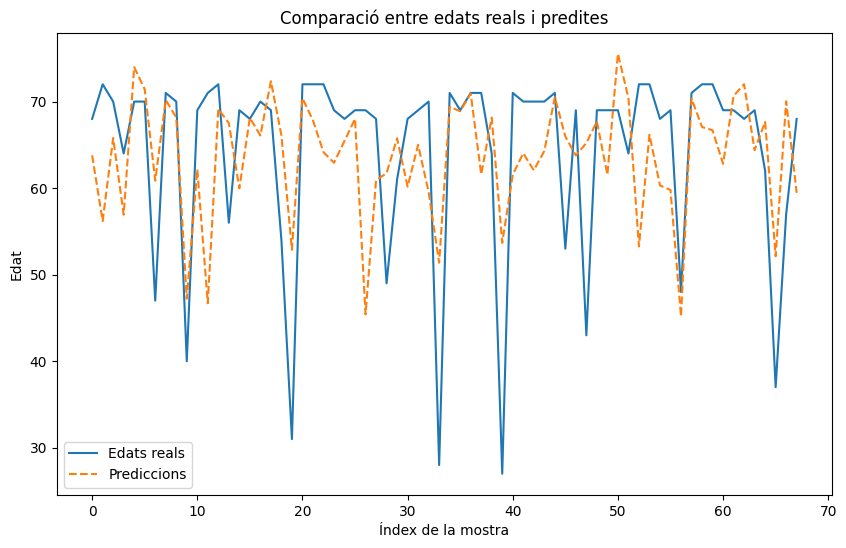

In [147]:
# Visualització de les prediccions vs valors reals
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Edats reals')
plt.plot(y_pred, label='Prediccions', linestyle='--')
plt.xlabel('Índex de la mostra')
plt.ylabel('Edat')
plt.title('Comparació entre edats reals i predites')
plt.legend()
plt.show()

In [148]:
# Correlació entre les prediccions i els valors originals
predictions_flat = y_pred.flatten()
y_test_original_flat = y_test.flatten()
correlation_RGC = np.corrcoef(predictions_flat, y_test)[0, 1]
print("Correlació entre les prediccions i els valors originals:", correlation_RGC)

Correlació entre les prediccions i els valors originals: 0.46753901397547626


Guardem els resultats de les mètriques de cada prova:

In [149]:
resultats_edats = pd.DataFrame({'Corrrelació': [correlation_ROA, correlation_ROC, correlation_RGA, correlation_RGC],
                              'Loss': [loss_ROA, loss_ROC, loss_RGA, loss_RGC],
                               'MSE': [mse_ROA, mse_ROC, mse_RGA, mse_RGC],
                               'MAE': [mae_ROA, mae_ROC, mae_RGA, mae_RGC]})
resultats_edats.index = ['ROA', 'ROC', 'RGA','RGC']
resultats_edats

,Corrrelació,Loss,MSE,MAE
ROA,0.218191,164.581039,162.054212,8.792492
ROC,0.588412,132.432220,129.921316,9.031208
RGA,0.534404,133.385849,129.973475,7.359889
RGC,0.467539,104.612740,100.085485,7.663770
